# **Prepare Data**

## **Import Library**

In [1]:
# Import library
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

## **Load Data**

In [2]:
# Load Data
path = "../Data Arduino 4 treatment/fixed_formatData.xlsx"
df = pd.read_excel(path)
df

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan
0,151,149.0,106.40,73,0,1
1,151,149.0,109.78,73,0,1
2,149,149.0,106.40,73,0,1
3,149,149.0,130.06,73,0,1
4,149,151.4,106.40,73,0,1
...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4
1437,149,153.8,140.20,64,3,4
1438,147,153.8,113.16,64,3,4
1439,149,153.8,123.30,64,3,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R                 1441 non-null   int64  
 1   G                 1441 non-null   float64
 2   B                 1441 non-null   float64
 3   IR_Intensity (%)  1441 non-null   int64  
 4   Perlakuan         1441 non-null   int64  
 5   Pengambilan       1441 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 67.7 KB


## **Checking Outliers**

### **Visualisasi Outliers**

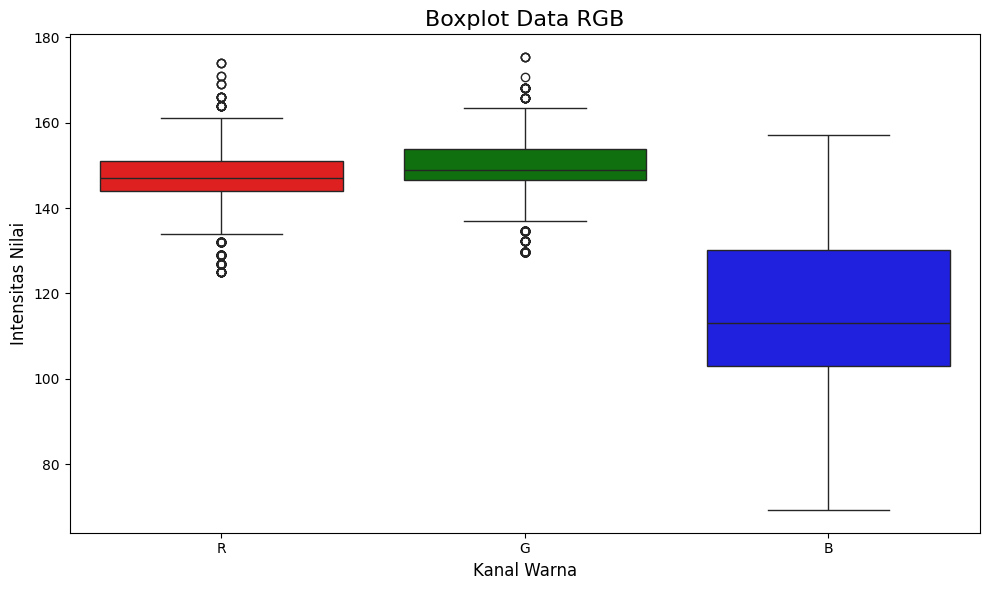

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['R', 'G', 'B']], palette=["red", "green", "blue"])
plt.title("Boxplot Data RGB", fontsize=16)
plt.ylabel("Intensitas Nilai", fontsize=12)
plt.xlabel("Kanal Warna", fontsize=12)
plt.tight_layout()
plt.show()


### **Mengatasi Outliers**

In [5]:

# Fungsi seteksi outlier dengan IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Deteksi outlier pada data RGB
outliers_R = detect_outliers_iqr(df['R'])
outliers_G = detect_outliers_iqr(df['G'])
outliers_B = detect_outliers_iqr(df['B'])

print("Outliers in R:", outliers_R)
print("Outliers in G:", outliers_G)
print("Outliers in B:", outliers_B)

Outliers in R: 33      164
55      164
73      164
254     132
255     129
       ... 
1215    164
1222    171
1229    174
1257    164
1263    164
Name: R, Length: 158, dtype: int64
Outliers in G: 27      165.8
254     132.2
255     129.8
256     132.2
257     132.2
        ...  
1199    165.8
1220    175.4
1241    175.4
1372    165.8
1416    165.8
Name: G, Length: 144, dtype: float64
Outliers in B: Series([], Name: B, dtype: float64)


In [6]:
# Membuat salinan DataFrame untuk analisis tanpa memodifikasi DataFrame asli
df_cleaned = df.copy()

# Menghapus outlier dari salinan DataFrame
df_cleaned = df_cleaned[~df_cleaned['R'].isin(outliers_R)]
df_cleaned = df_cleaned[~df_cleaned['G'].isin(outliers_G)]
df_cleaned = df_cleaned[~df_cleaned['B'].isin(outliers_B)]

# Menampilkan jumlah data sebelum dan sesudah pembersihan
print("Jumlah data sebelum pembersihan:", len(df))
print("Jumlah data setelah pembersihan:", len(df_cleaned))

Jumlah data sebelum pembersihan: 1441
Jumlah data setelah pembersihan: 1242


## **Preprocessing**

### **Normalisasi**

In [7]:
def normalize_rgb(df):
    # Salin dataframe
    df_norm = df.copy()
    # Normalisasi kolom R, G, dan B
    df_norm['r'] = df_norm['R'] / 255
    df_norm['g'] = df_norm['G'] / 255
    df_norm['b'] = df_norm['B'] / 255

    return df_norm

In [8]:
df_norm=normalize_rgb(df)
df_norm

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255
...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529


### **Perbandingan Kanal**

In [9]:
def calculate_ratios(df):
    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_rasio = df_norm.copy()

    # Hitung rasio R/G
    df_rasio['R_G_ratio'] = df_rasio['R'] / df_rasio['G']

    # Hitung rasio G/B
    df_rasio['G_B_ratio'] = df_rasio['G'] / df_rasio['B']

    return df_rasio

In [10]:
df_rasio = calculate_ratios(df_norm)
df_rasio

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R_G_ratio,G_B_ratio
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932
...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364


### **Mencari Nilai HSV**

In [11]:
def rgb_to_hsv(df):
    # Salin dataframe
    df_hsv = df_rasio.copy()
    
    # Ekstrak kolom r, g, dan b
    r = df_hsv['r']
    g = df_hsv['g']
    b = df_hsv['b']

    # Hitung nilai maksimum (V) dan minimum (m)
    cmax = np.maximum.reduce([r, g, b])
    cmin = np.minimum.reduce([r, g, b])
    delta = cmax - cmin

    # Hitung Hue (H)
    def calculate_hue():
        hue = np.zeros_like(delta)  # Default hue adalah 0
        mask_r_max = (cmax == r) & (delta != 0)
        mask_g_max = (cmax == g) & (delta != 0)
        mask_b_max = (cmax == b) & (delta != 0)

        # Rumus untuk hue jika R adalah maksimum
        hue[mask_r_max] = (60 * ((g[mask_r_max] - b[mask_r_max]) / delta[mask_r_max]) + 360) % 360

        # Rumus untuk hue jika G adalah maksimum
        hue[mask_g_max] = (60 * ((b[mask_g_max] - r[mask_g_max]) / delta[mask_g_max]) + 120) % 360

        # Rumus untuk hue jika B adalah maksimum
        hue[mask_b_max] = (60 * ((r[mask_b_max] - g[mask_b_max]) / delta[mask_b_max]) + 240) % 360

        return hue

    h = calculate_hue()

    # Hitung Saturation (S)
    s = np.where(cmax != 0, delta / cmax, 0)

    # Value (V) adalah nilai maksimum
    v = cmax

    # Tambahkan kolom h, s, dan v ke DataFrame
    df_hsv['H'] = h
    df_hsv['S'] = s
    df_hsv['V'] = v

    return df_hsv

In [12]:
df_hsv=rgb_to_hsv(df_rasio)
df_hsv

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R_G_ratio,G_B_ratio,H,S,V
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137


### **Mencari Nilai Lab**

#### **Hitung Manual**

In [13]:
def rgb_to_lab(df):
    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_lab = df_hsv.copy()

    # Normalisasi RGB ke rentang [0, 1]
    r = df_lab['r']
    g = df_lab['g']
    b = df_lab['b']

    # Koreksi gamma untuk nilai RGB
    def gamma_correction(c):
        return np.where(c > 0.04045, ((c + 0.055) / 1.055) ** 2.4, c / 12.92)

    # Terapkan koreksi gamma
    r_linear = gamma_correction(r)
    g_linear = gamma_correction(g)
    b_linear = gamma_correction(b)

    # Transformasi RGB ke XYZ menggunakan matriks standar
    X = 0.4124564 * r_linear + 0.3575761 * g_linear + 0.1804375 * b_linear
    Y = 0.2126729 * r_linear + 0.7151522 * g_linear + 0.0721750 * b_linear
    Z = 0.0193339 * r_linear + 0.1191920 * g_linear + 0.9503041 * b_linear

    # Nilai referensi untuk XYZ (D65/2° standard illuminant)
    Xn, Yn, Zn = 0.95047, 1.0, 1.08883

    # Fungsi untuk menghitung f(t)
    def f(t):
        return np.where(t > 0.008856, t ** (1/3), 7.787 * t + 16/116)

    # Hitung L, a, dan b
    L = 116 * f(Y / Yn) - 16
    a = 500 * (f(X / Xn) - f(Y / Yn))
    b = 200 * (f(Y / Yn) - f(Z / Zn))

    # Tambahkan kolom L, a, dan b ke DataFrame
    df_lab['cL'] = L
    df_lab['ca'] = a
    df_lab['cb'] = b

    return df_lab

In [14]:
df_lab=rgb_to_lab(df_hsv)
df_lab

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R_G_ratio,G_B_ratio,H,S,V,cL,ca,cb
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157,60.890564,-6.299734,22.830546
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157,60.953899,-5.827671,21.044019
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314,60.723155,-7.112026,22.577013
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314,61.218617,-3.447379,10.020923
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725,61.395413,-8.411532,23.476470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725,61.883257,-4.341136,7.130325
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137,62.788701,-4.301695,6.543102
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137,62.035710,-9.534773,20.581252
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137,62.399884,-7.187258,15.471242


In [15]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R                 1441 non-null   int64  
 1   G                 1441 non-null   float64
 2   B                 1441 non-null   float64
 3   IR_Intensity (%)  1441 non-null   int64  
 4   Perlakuan         1441 non-null   int64  
 5   Pengambilan       1441 non-null   int64  
 6   r                 1441 non-null   float64
 7   g                 1441 non-null   float64
 8   b                 1441 non-null   float64
 9   R_G_ratio         1441 non-null   float64
 10  G_B_ratio         1441 non-null   float64
 11  H                 1441 non-null   float64
 12  S                 1441 non-null   float64
 13  V                 1441 non-null   float64
 14  cL                1441 non-null   float64
 15  ca                1441 non-null   float64
 16  cb                1441 non-null   float64


#### **Hitung Dengan Library OpenCV**

In [16]:
def rgb_to_lab_with_opencv(df):

    # Membuat salinan DataFrame agar yang asli tidak berubah
    df_cv = df_hsv.copy()

    # Konversi RGB ke LAB menggunakan OpenCV
    rgb_values = df_cv[['R', 'G', 'B']].values.astype(np.uint8)
    rgb_values = rgb_values[:, ::-1]
    lab_values = cv2.cvtColor(rgb_values.reshape(1, -1, 3), cv2.COLOR_BGR2LAB).reshape(-1, 3)

    # Pisahkan nilai L, a, dan b
    L = lab_values[:, 0] * (100 / 255)  # Konversi L ke rentang [0, 100]
    
    # Ubah tipe data a dan b ke float sebelum penggeseran
    a = lab_values[:, 1].astype(float) - 128  # Geser a ke rentang [-128, 127]
    b = lab_values[:, 2].astype(float) - 128  # Geser b ke rentang [-128, 127]

    # Tambahkan kolom cL, ca, dan cb ke DataFrame
    df_cv['cL'] = L
    df_cv['ca'] = a
    df_cv['cb'] = b

    return df_cv

In [17]:
df_cv=rgb_to_lab_with_opencv(df_hsv)
df_cv

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan,r,g,b,R_G_ratio,G_B_ratio,H,S,V,cL,ca,cb
0,151,149.0,106.40,73,0,1,0.592157,0.584314,0.417255,1.013423,1.400376,57.309417,0.295364,0.592157,60.784314,-6.0,23.0
1,151,149.0,109.78,73,0,1,0.592157,0.584314,0.430510,1.013423,1.357260,57.088792,0.272980,0.592157,61.176471,-6.0,21.0
2,149,149.0,106.40,73,0,1,0.584314,0.584314,0.417255,1.000000,1.400376,60.000000,0.285906,0.584314,60.784314,-7.0,23.0
3,149,149.0,130.06,73,0,1,0.584314,0.584314,0.510039,1.000000,1.145625,60.000000,0.127114,0.584314,61.176471,-4.0,10.0
4,149,151.4,106.40,73,0,1,0.584314,0.593725,0.417255,0.984148,1.422932,63.200000,0.297226,0.593725,61.176471,-8.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4,0.576471,0.593725,0.536549,0.970938,1.106563,78.106996,0.096301,0.593725,61.960784,-4.0,7.0
1437,149,153.8,140.20,64,3,4,0.584314,0.603137,0.549804,0.968791,1.097004,81.176471,0.088427,0.603137,62.745098,-4.0,6.0
1438,147,153.8,113.16,64,3,4,0.576471,0.603137,0.443765,0.955787,1.359138,70.039370,0.264239,0.603137,61.960784,-9.0,20.0
1439,149,153.8,123.30,64,3,4,0.584314,0.603137,0.483529,0.968791,1.247364,69.442623,0.198309,0.603137,62.352941,-7.0,15.0


# **Klasifikasi**

## **Import Library**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

## **Mempersiapkan Data**

<Axes: xlabel='Perlakuan'>

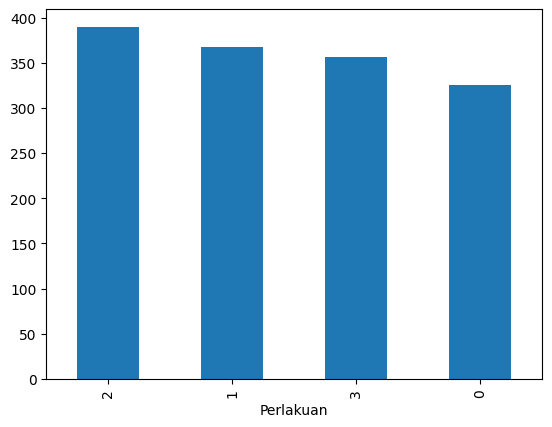

In [22]:
# Check Imbalance
df_cv['Perlakuan'].value_counts().plot(kind='bar')

In [23]:
def prepare_data_variasi_fitur(df):
    # Definisi grup fitur
    grup_fitur = {
        'semua_fitur': ['R', 'G', 'B', 'r', 'g', 'b', 'R_G_ratio', 'G_B_ratio', 'H', 'S', 'V', 'cL', 'ca', 'cb'],
        'RGB': ['R', 'G', 'B'],
        'rgb': ['r', 'g', 'b'],
        'HSV': ['H', 'S', 'V'],
        'CLab': ['cL', 'ca', 'cb'],
        'R/G_ratio': ['R_G_ratio'],
        'G/B_ratio': ['G_B_ratio'],
        
    }
    
    kombinasi_grup = {
    'Full': grup_fitur['semua_fitur'],
    'RGB': grup_fitur['RGB'],
    'rgb': grup_fitur['rgb'],
    'HSV': grup_fitur['HSV'],
    'CLab': grup_fitur['CLab'],
    'RGB_HSV': grup_fitur['RGB'] + grup_fitur['HSV'],
    'RGB_CLab': grup_fitur['RGB'] + grup_fitur['CLab'],
    'HSV_CLab': grup_fitur['HSV'] + grup_fitur['CLab'],
    'RGB_R/G_ratio': grup_fitur['RGB'] + grup_fitur['R/G_ratio'],
    'RGB_G/B_ratio': grup_fitur['RGB'] + grup_fitur['G/B_ratio'],
    'rgb_HSV': grup_fitur['rgb'] + grup_fitur['HSV'],
    'rgb_CLab': grup_fitur['rgb'] + grup_fitur['CLab'],
    'HSV_R/G_ratio': grup_fitur['HSV'] + grup_fitur['R/G_ratio'],
    'HSV_G/B_ratio': grup_fitur['HSV'] + grup_fitur['G/B_ratio'],
    'CLab_R/G_ratio': grup_fitur['CLab'] + grup_fitur['R/G_ratio'],
    'CLab_G/B_ratio': grup_fitur['CLab'] + grup_fitur['G/B_ratio'],
    'RGB_HSV_CLab': grup_fitur['RGB'] + grup_fitur['HSV'] + grup_fitur['CLab'],
    'RGB_R/G_ratio_G/B_ratio': grup_fitur['RGB'] + grup_fitur['R/G_ratio'] + grup_fitur['G/B_ratio'],
    'RGB_HSV_R/G_ratio': grup_fitur['RGB'] + grup_fitur['HSV'] + grup_fitur['R/G_ratio'],
    'RGB_HSV_G/B_ratio': grup_fitur['RGB'] + grup_fitur['HSV'] + grup_fitur['G/B_ratio'],
    'rgb_HSV_CLab': grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['CLab'],
    'rgb_R/G_ratio_G/B_ratio': grup_fitur['rgb'] + grup_fitur['R/G_ratio'] + grup_fitur['G/B_ratio'],
    'rgb_HSV_R/G_ratio': grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['R/G_ratio'],
    'rgb_HSV_G/B_ratio': grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['G/B_ratio'],
    'CLab_R/G_ratio_G/B_ratio': grup_fitur['CLab'] + grup_fitur['R/G_ratio'] + grup_fitur['G/B_ratio'],
    'CLab_HSV_R/G_ratio': grup_fitur['CLab'] + grup_fitur['HSV'] + grup_fitur['R/G_ratio'],
    'CLab_HSV_G/B_ratio': grup_fitur['CLab'] + grup_fitur['HSV'] + grup_fitur['G/B_ratio'],
    'RGB_CLab_R/G_ratio': grup_fitur['RGB'] + grup_fitur['CLab'] + grup_fitur['R/G_ratio'],
    'RGB_CLab_G/B_ratio': grup_fitur['RGB'] + grup_fitur['CLab'] + grup_fitur['G/B_ratio'],
    'rgb_CLab_R/G_ratio': grup_fitur['rgb'] + grup_fitur['CLab'] + grup_fitur['R/G_ratio'],
    'rgb_CLab_G/B_ratio': grup_fitur['rgb'] + grup_fitur['CLab'] + grup_fitur['G/B_ratio'],
    'RGB_rgb_HSV': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['HSV'],
    'RGB_rgb_CLab': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['CLab'],
    'RGB_rgb_R/G_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['R/G_ratio'],
    'RGB_rgb_G/B_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['G/B_ratio'],
    'RGB_HSV_rgb': grup_fitur['RGB'] + grup_fitur['HSV'] + grup_fitur['rgb'],
    'RGB_HSV_CLab_rgb': grup_fitur['RGB'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['rgb'],
    'RGB_HSV_CLab_R/G_ratio': grup_fitur['RGB'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['R/G_ratio'],
    'RGB_HSV_CLab_G/B_ratio': grup_fitur['RGB'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['G/B_ratio'],
    'RGB_rgb_HSV_CLab': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['CLab'],
    'RGB_rgb_HSV_R/G_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['R/G_ratio'],
    'RGB_rgb_HSV_G/B_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['G/B_ratio'],
    'RGB_rgb_CLab_R/G_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['CLab'] + grup_fitur['R/G_ratio'],
    'RGB_rgb_CLab_G/B_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['CLab'] + grup_fitur['G/B_ratio'],
    'rgb_HSV_CLab_R/G_ratio': grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['R/G_ratio'],
    'rgb_HSV_CLab_G/B_ratio': grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['G/B_ratio'],
    'RGB_HSV_CLab_R/G_ratio_G/B_ratio': grup_fitur['RGB'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['R/G_ratio'] + grup_fitur['G/B_ratio'],
    'RGB_rgb_HSV_CLab_R/G_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['R/G_ratio'],
    'RGB_rgb_HSV_CLab_G/B_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['G/B_ratio'],
    'RGB_rgb_HSV_CLab_R/G_ratio_G/B_ratio': grup_fitur['RGB'] + grup_fitur['rgb'] + grup_fitur['HSV'] + grup_fitur['CLab'] + grup_fitur['R/G_ratio'] + grup_fitur['G/B_ratio'],
    }

    hasil = {}
    
    for nama_grup, fitur in kombinasi_grup.items():
        X = df[fitur]
        y = df['Perlakuan']
        
        # Membagi data menjadi set pelatihan dan pengujian
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        # Preprocessing untuk ANN: MinMaxScaler
        scaler_ann = MinMaxScaler()
        X_train_ann = scaler_ann.fit_transform(X_train)
        X_test_ann = scaler_ann.transform(X_test)
        
        # Preprocessing untuk AdaBoost SVM: StandardScaler
        scaler_svm = StandardScaler()
        X_train_svm = scaler_svm.fit_transform(X_train)
        X_test_svm = scaler_svm.transform(X_test)
        
        # Preprocessing untuk AdaBoost DT: Tanpa scaling
        X_train_dt = X_train.values
        X_test_dt = X_test.values
        
        hasil[nama_grup] = {
            'X_train_ann': X_train_ann, 'X_test_ann': X_test_ann,
            'X_train_svm': X_train_svm, 'X_test_svm': X_test_svm,
            'X_train_dt': X_train_dt, 'X_test_dt': X_test_dt,
            'y_train': y_train, 'y_test': y_test,
            'fitur': fitur
        }
        
        print(f"Grup: {nama_grup}")
        print(f"Jumlah fitur yang digunakan: {len(fitur)}")
        print(f"Fitur: {fitur}")
        print(f"Jumlah data training: {X_train.shape[0]}")
        print(f"Jumlah data testing: {X_test.shape[0]}\n")
    
    return hasil


In [24]:
data_prep = prepare_data_variasi_fitur(df_lab)

Grup: Full
Jumlah fitur yang digunakan: 14
Fitur: ['R', 'G', 'B', 'r', 'g', 'b', 'R_G_ratio', 'G_B_ratio', 'H', 'S', 'V', 'cL', 'ca', 'cb']
Jumlah data training: 1008
Jumlah data testing: 433

Grup: RGB
Jumlah fitur yang digunakan: 3
Fitur: ['R', 'G', 'B']
Jumlah data training: 1008
Jumlah data testing: 433

Grup: rgb
Jumlah fitur yang digunakan: 3
Fitur: ['r', 'g', 'b']
Jumlah data training: 1008
Jumlah data testing: 433

Grup: HSV
Jumlah fitur yang digunakan: 3
Fitur: ['H', 'S', 'V']
Jumlah data training: 1008
Jumlah data testing: 433

Grup: CLab
Jumlah fitur yang digunakan: 3
Fitur: ['cL', 'ca', 'cb']
Jumlah data training: 1008
Jumlah data testing: 433

Grup: RGB_HSV
Jumlah fitur yang digunakan: 6
Fitur: ['R', 'G', 'B', 'H', 'S', 'V']
Jumlah data training: 1008
Jumlah data testing: 433

Grup: RGB_CLab
Jumlah fitur yang digunakan: 6
Fitur: ['R', 'G', 'B', 'cL', 'ca', 'cb']
Jumlah data training: 1008
Jumlah data testing: 433

Grup: HSV_CLab
Jumlah fitur yang digunakan: 6
Fitur: ['H', 

## **Membangun Model**

### **Artiifical Neural Network (ANN)**

In [25]:
def train_ann(X_train, y_train, X_test, y_test):
    print("=== Melatih Model ANN ===")
    ann = MLPClassifier(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='adam',
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    )
    ann.fit(X_train, y_train)
    y_pred = ann.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    y_prob = ann.predict_proba(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Ekstraksi metrik
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    print(f"Akurasi ANN: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    return ann, y_pred, y_prob, acc, precision, recall, f1_score

In [26]:
# ann_model, y_pred_ann, y_prob_ann,acc_ann, prec_ann, rec_ann, f1_ann = train_ann(
#     data_prep['X_train_ann'], data_prep['y_train'],
#     data_prep['X_test_ann'], data_prep['y_test']
# )

### **Adaboost Decision Tree**

In [27]:
def train_adaboost_dt(X_train, y_train, X_test, y_test):
    print("\n=== Melatih Model AdaBoost dengan Decision Tree ===")
    dt = DecisionTreeClassifier(max_depth=3, random_state=42)
    adaboost_dt = AdaBoostClassifier(
        estimator=dt,
        n_estimators=50,
        learning_rate=1.0,
        random_state=42
    )
    adaboost_dt.fit(X_train, y_train)
    y_pred = adaboost_dt.predict(X_test)
    y_prob = adaboost_dt.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Ekstraksi metrik
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    print(f"Akurasi AdaBoost (DT): {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    return adaboost_dt, y_pred, y_prob, acc, precision, recall, f1_score

In [28]:
# adaboost_dt_model, y_pred_adaboost_dt, y_prob_ada_dt,acc_adaboost_dt, prec_adaboost_dt, rec_adaboost_dt, f1_adaboost_dt = train_adaboost_dt(
#     data_prep['X_train_dt'], data_prep['y_train'], 
#     data_prep['X_test_dt'], data_prep['y_test']
# )

### **Adaboost Support Vector Machine (SVM) Kernel RBF**

In [29]:
def train_adaboost_svm(X_train, y_train, X_test, y_test):
    print("\n=== Melatih Model AdaBoost dengan SVM RBF Kernel ===")
    svm = SVC(kernel='rbf', probability=True, random_state=42)
    adaboost_svm = AdaBoostClassifier(
        estimator=svm,
        n_estimators=50,
        learning_rate=1.0,
        random_state=42
    )
    adaboost_svm.fit(X_train, y_train)
    y_pred = adaboost_svm.predict(X_test)
    y_prob = adaboost_svm.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Ekstraksi metrik
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    print(f"Akurasi AdaBoost (SVM): {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    return adaboost_svm, y_pred, y_prob, acc, precision, recall, f1_score

In [30]:
# adaboost_svm_model, y_pred_adaboost_svm, y_prob_ada_svm, acc_adaboost_svm, prec_adaboost_svm, rec_adaboost_svm, f1_adaboost_svm = train_adaboost_svm(
#     data_prep['X_train_svm'], data_prep['y_train'], 
#     data_prep['X_test_svm'], data_prep['y_test']
# )

### **Bagging Support Vector Machine (SVM) Kernel RBF**

In [31]:
def train_bagging_svm(X_train, y_train, X_test, y_test):
    print("\n=== Melatih Model Bagging dengan SVM RBF Kernel ===")
    svm = SVC(kernel='rbf', probability=True, random_state=42)
    bagging_svm = BaggingClassifier(
        estimator=svm,
        n_estimators=50,
        random_state=42,
        n_jobs=-1
    )
    bagging_svm.fit(X_train, y_train)
    y_pred = bagging_svm.predict(X_test)
    y_prob = bagging_svm.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Ekstraksi metrik
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    print(f"Akurasi Bagging (SVM): {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    return bagging_svm, y_pred, y_prob, acc, precision, recall, f1_score

In [32]:
# bagging_svm_model, y_pred_bagging_svm, y_prob_bag_svm, acc_bagging_svm, prec_bagging_svm, rec_bagging_svm, f1_bagging_svm = train_bagging_svm(
#     data_prep['X_train_svm'], data_prep['y_train'], 
#     data_prep['X_test_svm'], data_prep['y_test']
# )

## **Training dan Evaluasi Model**

In [33]:
import pandas as pd

def evaluate_single_model(feature_groups, model_func, model_name):
    results = {}
    metrics_data = []  # List untuk menyimpan data untuk DataFrame

    for group_name, data in feature_groups.items():
        print(f"\n=== Mengolah Grup Fitur: {group_name} dengan Model: {model_name} ===")
        X_train_ann = data['X_train_ann']
        X_test_ann = data['X_test_ann']
        X_train_svm = data['X_train_svm']
        X_test_svm = data['X_test_svm']
        X_train_dt = data['X_train_dt']
        X_test_dt = data['X_test_dt']
        y_train = data['y_train']
        y_test = data['y_test']
        
        # Pilih preprocessing sesuai model
        if model_name == 'ANN':
            model, y_pred, y_prob, acc, precision, recall, f1 = model_func(X_train_ann, y_train, X_test_ann, y_test)
        elif model_name == 'AdaBoost DT':
            model, y_pred, y_prob, acc, precision, recall, f1 = model_func(X_train_dt, y_train, X_test_dt, y_test)
        elif model_name == 'AdaBoost SVM':
            model, y_pred, y_prob, acc, precision, recall, f1 = model_func(X_train_svm, y_train, X_test_svm, y_test)        
        elif model_name == 'Bagging SVM':
            model, y_pred, y_prob, acc, precision, recall, f1 = model_func(X_train_svm, y_train, X_test_svm, y_test)
        else:
            raise ValueError(f"Model {model_name} tidak dikenali.")
        
        # Simpan hasil ke dalam dictionary
        results[group_name] = {
            'model': model,
            'y_pred': y_pred,
            'y_prob': y_prob,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

        # Tambahkan data ke dalam list untuk DataFrame
        metrics_data.append({
            'Feature Group': group_name,
            'Model': model_name,
            'Accuracy': acc,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })

    # Buat DataFrame dari metrics_data
    metrics_df = pd.DataFrame(metrics_data)
    metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)
    metrics_df.reset_index(drop=True, inplace=True)

    return results, metrics_df

### **Artiﬁcial Neural Network (ANN)**

In [34]:
results_ann, metrics_df_ann = evaluate_single_model(
    data_prep, train_ann, 'ANN'
)


=== Mengolah Grup Fitur: Full dengan Model: ANN ===
=== Melatih Model ANN ===
Akurasi ANN: 0.4296
              precision    recall  f1-score   support

           0       0.70      0.59      0.64        96
           1       0.41      0.35      0.38       114
           2       0.31      0.59      0.41       106
           3       0.50      0.22      0.31       117

    accuracy                           0.43       433
   macro avg       0.48      0.44      0.43       433
weighted avg       0.47      0.43      0.43       433


=== Mengolah Grup Fitur: RGB dengan Model: ANN ===
=== Melatih Model ANN ===
Akurasi ANN: 0.4827
              precision    recall  f1-score   support

           0       0.52      0.68      0.59        96
           1       0.42      0.25      0.32       114
           2       0.36      0.58      0.44       106
           3       0.77      0.46      0.58       117

    accuracy                           0.48       433
   macro avg       0.52      0.49      0.4

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi ANN: 0.3326
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.30      0.96      0.45       114
           2       0.00      0.00      0.00       106
           3       0.54      0.29      0.38       117

    accuracy                           0.33       433
   macro avg       0.21      0.31      0.21       433
weighted avg       0.22      0.33      0.22       433


=== Mengolah Grup Fitur: RGB_HSV dengan Model: ANN ===
=== Melatih Model ANN ===
Akurasi ANN: 0.4503
              precision    recall  f1-score   support

           0       0.57      0.67      0.61        96
           1       0.35      0.28      0.31       114
           2       0.31      0.49      0.38       106
           3       0.76      0.40      0.53       117

    accuracy                           0.45       433
   macro avg       0.50      0.46      0.46       433
weighted avg       0.50      0.45      0.45       433


=== Men

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi ANN: 0.3788
              precision    recall  f1-score   support

           0       0.64      0.45      0.53        96
           1       0.34      0.36      0.35       114
           2       0.27      0.51      0.35       106
           3       0.58      0.22      0.32       117

    accuracy                           0.38       433
   macro avg       0.46      0.38      0.39       433
weighted avg       0.45      0.38      0.38       433


=== Mengolah Grup Fitur: RGB_R/G_ratio dengan Model: ANN ===
=== Melatih Model ANN ===
Akurasi ANN: 0.4942
              precision    recall  f1-score   support

           0       0.54      0.69      0.60        96
           1       0.43      0.26      0.33       114
           2       0.37      0.58      0.45       106
           3       0.75      0.49      0.59       117

    accuracy                           0.49       433
   macro avg       0.52      0.50      0.49       433
weighted avg       0.53      0.49      0.49       433


=

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi ANN: 0.4503
              precision    recall  f1-score   support

           0       0.57      0.67      0.61        96
           1       0.35      0.28      0.31       114
           2       0.31      0.49      0.38       106
           3       0.76      0.40      0.53       117

    accuracy                           0.45       433
   macro avg       0.50      0.46      0.46       433
weighted avg       0.50      0.45      0.45       433


=== Mengolah Grup Fitur: rgb_CLab dengan Model: ANN ===
=== Melatih Model ANN ===
Akurasi ANN: 0.3487
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.33      0.29      0.31       114
           2       0.31      0.73      0.44       106
           3       0.49      0.35      0.41       117

    accuracy                           0.35       433
   macro avg       0.28      0.34      0.29       433
weighted avg       0.29      0.35      0.30       433


=== Me

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.22      0.30      0.25       114
           2       0.28      0.67      0.40       106
           3       0.62      0.14      0.22       117

    accuracy                           0.28       433
   macro avg       0.28      0.28      0.22       433
weighted avg       0.29      0.28      0.22       433


=== Mengolah Grup Fitur: HSV_G/B_ratio dengan Model: ANN ===
=== Melatih Model ANN ===
Akurasi ANN: 0.3903
              precision    recall  f1-score   support

           0       0.53      0.66      0.59        96
           1       0.33      0.22      0.26       114
           2       0.29      0.51      0.37       106
           3       0.51      0.23      0.32       117

    accuracy                           0.39       433
   macro avg       0.41      0.40      0.38       433
weighted avg       0.41      0.39      0.38       433


=== Mengolah Grup Fit

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

              precision    recall  f1-score   support

           0       0.50      0.48      0.49        96
           1       0.00      0.00      0.00       114
           2       0.30      0.96      0.46       106
           3       0.75      0.03      0.05       117

    accuracy                           0.35       433
   macro avg       0.39      0.37      0.25       433
weighted avg       0.39      0.35      0.23       433


=== Mengolah Grup Fitur: RGB_HSV_CLab dengan Model: ANN ===
=== Melatih Model ANN ===
Akurasi ANN: 0.3834
              precision    recall  f1-score   support

           0       0.54      0.58      0.56        96
           1       0.35      0.19      0.25       114
           2       0.30      0.58      0.39       106
           3       0.44      0.23      0.30       117

    accuracy                           0.38       433
   macro avg       0.41      0.40      0.38       433
weighted avg       0.40      0.38      0.37       433


=== Mengolah Grup Fitu

#### **Perbandingan Hasil ANN**

In [35]:
metrics_df_ann

,Feature Group,Model,Accuracy,Precision,Recall,F1-Score
0,RGB_R/G_ratio,ANN,0.494226,0.526594,0.494226,0.489765
1,RGB_HSV_G/B_ratio,ANN,0.482679,0.536698,0.482679,0.486248
2,rgb,ANN,0.482679,0.522750,0.482679,0.478521
3,RGB,ANN,0.482679,0.522750,0.482679,0.478521
4,rgb_HSV_G/B_ratio,ANN,0.482679,0.536698,0.482679,0.486248
5,RGB_rgb_R/G_ratio,ANN,0.478060,0.513048,0.478060,0.475808
6,RGB_HSV_CLab_R/G_ratio_G/B_ratio,ANN,0.475751,0.507404,0.475751,0.475633
7,RGB_rgb_HSV_R/G_ratio,ANN,0.466513,0.502593,0.466513,0.465671
8,RGB_HSV_rgb,ANN,0.452656,0.476199,0.452656,0.450141
9,RGB_HSV,ANN,0.450346,0.499213,0.450346,0.453133


### **Adaboost Decision Tree**

In [36]:
result_adaboost_dt, metrics_df_adaboost_dt = evaluate_single_model(
    data_prep, train_adaboost_dt, 'AdaBoost DT'
)


=== Mengolah Grup Fitur: Full dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5797


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.62      0.67      0.64        96
           1       0.47      0.55      0.51       114
           2       0.62      0.58      0.60       106
           3       0.64      0.54      0.59       117

    accuracy                           0.58       433
   macro avg       0.59      0.58      0.58       433
weighted avg       0.59      0.58      0.58       433


=== Mengolah Grup Fitur: RGB dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.4503
              precision    recall  f1-score   support

           0       0.38      0.51      0.44        96
           1       0.47      0.40      0.43       114
           2       0.50      0.48      0.49       106
           3       0.48      0.42      0.45       117

    accuracy                           0.45       433
   macro avg       0.46      0.45      0.45       433
weighted avg       0.46      0.45      0.4

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.4503
              precision    recall  f1-score   support

           0       0.38      0.51      0.44        96
           1       0.47      0.40      0.43       114
           2       0.50      0.48      0.49       106
           3       0.48      0.42      0.45       117

    accuracy                           0.45       433
   macro avg       0.46      0.45      0.45       433
weighted avg       0.46      0.45      0.45       433


=== Mengolah Grup Fitur: HSV dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5912
              precision    recall  f1-score   support

           0       0.59      0.61      0.60        96
           1       0.61      0.39      0.47       114
           2       0.49      0.61      0.54       106
           3       0.69      0.75      0.72       117

    accuracy                           0.59       433
   macro avg       0.59      0.59      0.58       433
weighted avg

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.5312
              precision    recall  f1-score   support

           0       0.53      0.66      0.59        96
           1       0.49      0.45      0.47       114
           2       0.60      0.63      0.62       106
           3       0.49      0.42      0.45       117

    accuracy                           0.53       433
   macro avg       0.53      0.54      0.53       433
weighted avg       0.53      0.53      0.53       433


=== Mengolah Grup Fitur: RGB_HSV dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5635
              precision    recall  f1-score   support

           0       0.50      0.74      0.60        96
           1       0.59      0.42      0.49       114
           2       0.47      0.51      0.49       106
           3       0.75      0.61      0.67       117

    accuracy                           0.56       433
   macro avg       0.58      0.57      0.56       433
weighted

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.5543
              precision    recall  f1-score   support

           0       0.61      0.76      0.68        96
           1       0.46      0.54      0.50       114
           2       0.53      0.47      0.50       106
           3       0.64      0.47      0.54       117

    accuracy                           0.55       433
   macro avg       0.56      0.56      0.56       433
weighted avg       0.56      0.55      0.55       433


=== Mengolah Grup Fitur: HSV_CLab dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5774
              precision    recall  f1-score   support

           0       0.57      0.76      0.65        96
           1       0.52      0.44      0.47       114
           2       0.59      0.75      0.66       106
           3       0.67      0.41      0.51       117

    accuracy                           0.58       433
   macro avg       0.58      0.59      0.57       433
weighte

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.5727
              precision    recall  f1-score   support

           0       0.58      0.78      0.66        96
           1       0.58      0.52      0.55       114
           2       0.52      0.68      0.59       106
           3       0.66      0.36      0.46       117

    accuracy                           0.57       433
   macro avg       0.58      0.58      0.57       433
weighted avg       0.59      0.57      0.56       433


=== Mengolah Grup Fitur: RGB_G/B_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5751
              precision    recall  f1-score   support

           0       0.47      0.61      0.53        96
           1       0.66      0.53      0.59       114
           2       0.56      0.46      0.51       106
           3       0.63      0.69      0.66       117

    accuracy                           0.58       433
   macro avg       0.58      0.57      0.57       433
we

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.6097
              precision    recall  f1-score   support

           0       0.55      0.65      0.60        96
           1       0.64      0.47      0.54       114
           2       0.54      0.58      0.56       106
           3       0.70      0.74      0.72       117

    accuracy                           0.61       433
   macro avg       0.61      0.61      0.61       433
weighted avg       0.61      0.61      0.61       433


=== Mengolah Grup Fitur: HSV_G/B_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.6212
              precision    recall  f1-score   support

           0       0.63      0.50      0.56        96
           1       0.60      0.54      0.57       114
           2       0.56      0.67      0.61       106
           3       0.69      0.75      0.72       117

    accuracy                           0.62       433
   macro avg       0.62      0.62      0.62       433
we

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.5497
              precision    recall  f1-score   support

           0       0.58      0.69      0.63        96
           1       0.47      0.43      0.45       114
           2       0.51      0.49      0.50       106
           3       0.63      0.61      0.62       117

    accuracy                           0.55       433
   macro avg       0.55      0.55      0.55       433
weighted avg       0.55      0.55      0.55       433


=== Mengolah Grup Fitur: CLab_G/B_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5912
              precision    recall  f1-score   support

           0       0.55      0.52      0.53        96
           1       0.63      0.48      0.55       114
           2       0.52      0.55      0.53       106
           3       0.65      0.79      0.72       117

    accuracy                           0.59       433
   macro avg       0.59      0.59      0.58       433
w

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.5704
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        96
           1       0.45      0.68      0.55       114
           2       0.56      0.39      0.46       106
           3       0.67      0.51      0.58       117

    accuracy                           0.57       433
   macro avg       0.59      0.57      0.57       433
weighted avg       0.59      0.57      0.57       433


=== Mengolah Grup Fitur: RGB_R/G_ratio_G/B_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5704
              precision    recall  f1-score   support

           0       0.60      0.65      0.62        96
           1       0.50      0.40      0.45       114
           2       0.58      0.77      0.66       106
           3       0.59      0.49      0.54       117

    accuracy                           0.57       433
   macro avg       0.57      0.58      0.57   

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.5843
              precision    recall  f1-score   support

           0       0.54      0.59      0.57        96
           1       0.60      0.52      0.55       114
           2       0.52      0.46      0.49       106
           3       0.65      0.75      0.70       117

    accuracy                           0.58       433
   macro avg       0.58      0.58      0.58       433
weighted avg       0.58      0.58      0.58       433


=== Mengolah Grup Fitur: RGB_HSV_G/B_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5982
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        96
           1       0.65      0.53      0.58       114
           2       0.57      0.57      0.57       106
           3       0.68      0.69      0.68       117

    accuracy                           0.60       433
   macro avg       0.60      0.60      0.60       43

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.5704
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        96
           1       0.45      0.68      0.55       114
           2       0.56      0.39      0.46       106
           3       0.67      0.51      0.58       117

    accuracy                           0.57       433
   macro avg       0.59      0.57      0.57       433
weighted avg       0.59      0.57      0.57       433


=== Mengolah Grup Fitur: rgb_R/G_ratio_G/B_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5704
              precision    recall  f1-score   support

           0       0.60      0.65      0.62        96
           1       0.50      0.40      0.45       114
           2       0.58      0.77      0.66       106
           3       0.59      0.49      0.54       117

    accuracy                           0.57       433
   macro avg       0.57      0.58      0.57   

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.5843
              precision    recall  f1-score   support

           0       0.54      0.59      0.57        96
           1       0.60      0.52      0.55       114
           2       0.52      0.46      0.49       106
           3       0.65      0.75      0.70       117

    accuracy                           0.58       433
   macro avg       0.58      0.58      0.58       433
weighted avg       0.58      0.58      0.58       433


=== Mengolah Grup Fitur: rgb_HSV_G/B_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5982
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        96
           1       0.65      0.53      0.58       114
           2       0.57      0.57      0.57       106
           3       0.68      0.69      0.68       117

    accuracy                           0.60       433
   macro avg       0.60      0.60      0.60       43

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.6120
              precision    recall  f1-score   support

           0       0.55      0.68      0.61        96
           1       0.60      0.57      0.58       114
           2       0.59      0.51      0.55       106
           3       0.71      0.69      0.70       117

    accuracy                           0.61       433
   macro avg       0.61      0.61      0.61       433
weighted avg       0.61      0.61      0.61       433


=== Mengolah Grup Fitur: CLab_HSV_R/G_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5335
              precision    recall  f1-score   support

           0       0.59      0.57      0.58        96
           1       0.47      0.59      0.52       114
           2       0.55      0.56      0.55       106
           3       0.57      0.43      0.49       117

    accuracy                           0.53       433
   macro avg       0.54      0.54      0.54       4

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.5958
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        96
           1       0.69      0.31      0.42       114
           2       0.55      0.82      0.66       106
           3       0.64      0.73      0.68       117

    accuracy                           0.60       433
   macro avg       0.61      0.60      0.58       433
weighted avg       0.61      0.60      0.58       433


=== Mengolah Grup Fitur: RGB_CLab_R/G_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5751
              precision    recall  f1-score   support

           0       0.53      0.74      0.62        96
           1       0.55      0.43      0.48       114
           2       0.54      0.56      0.55       106
           3       0.70      0.60      0.65       117

    accuracy                           0.58       433
   macro avg       0.58      0.58      0.57       4

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.6282
              precision    recall  f1-score   support

           0       0.69      0.72      0.70        96
           1       0.52      0.63      0.57       114
           2       0.58      0.54      0.56       106
           3       0.77      0.63      0.69       117

    accuracy                           0.63       433
   macro avg       0.64      0.63      0.63       433
weighted avg       0.64      0.63      0.63       433


=== Mengolah Grup Fitur: rgb_CLab_R/G_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5751
              precision    recall  f1-score   support

           0       0.53      0.74      0.62        96
           1       0.55      0.43      0.48       114
           2       0.54      0.56      0.55       106
           3       0.70      0.60      0.65       117

    accuracy                           0.58       433
   macro avg       0.58      0.58      0.57       4

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.6282
              precision    recall  f1-score   support

           0       0.69      0.72      0.70        96
           1       0.52      0.63      0.57       114
           2       0.58      0.54      0.56       106
           3       0.77      0.63      0.69       117

    accuracy                           0.63       433
   macro avg       0.64      0.63      0.63       433
weighted avg       0.64      0.63      0.63       433


=== Mengolah Grup Fitur: RGB_rgb_HSV dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.6259
              precision    recall  f1-score   support

           0       0.65      0.62      0.63        96
           1       0.58      0.54      0.55       114
           2       0.55      0.57      0.56       106
           3       0.72      0.77      0.74       117

    accuracy                           0.63       433
   macro avg       0.62      0.62      0.62       433
weig

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.5312
              precision    recall  f1-score   support

           0       0.54      0.61      0.58        96
           1       0.49      0.47      0.48       114
           2       0.54      0.60      0.57       106
           3       0.56      0.45      0.50       117

    accuracy                           0.53       433
   macro avg       0.53      0.54      0.53       433
weighted avg       0.53      0.53      0.53       433


=== Mengolah Grup Fitur: RGB_rgb_R/G_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5312
              precision    recall  f1-score   support

           0       0.56      0.65      0.60        96
           1       0.48      0.60      0.53       114
           2       0.57      0.50      0.53       106
           3       0.53      0.40      0.46       117

    accuracy                           0.53       433
   macro avg       0.54      0.54      0.53       43

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.5589
              precision    recall  f1-score   support

           0       0.53      0.71      0.60        96
           1       0.54      0.46      0.50       114
           2       0.57      0.60      0.59       106
           3       0.61      0.49      0.54       117

    accuracy                           0.56       433
   macro avg       0.56      0.57      0.56       433
weighted avg       0.56      0.56      0.56       433


=== Mengolah Grup Fitur: RGB_HSV_rgb dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.6097
              precision    recall  f1-score   support

           0       0.65      0.68      0.66        96
           1       0.54      0.41      0.47       114
           2       0.54      0.73      0.62       106
           3       0.72      0.64      0.68       117

    accuracy                           0.61       433
   macro avg       0.61      0.61      0.61       433
weig

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.5774
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        96
           1       0.51      0.62      0.56       114
           2       0.55      0.43      0.49       106
           3       0.64      0.58      0.61       117

    accuracy                           0.58       433
   macro avg       0.58      0.58      0.58       433
weighted avg       0.58      0.58      0.58       433


=== Mengolah Grup Fitur: RGB_HSV_CLab_R/G_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.6374
              precision    recall  f1-score   support

           0       0.60      0.77      0.67        96
           1       0.63      0.49      0.55       114
           2       0.53      0.51      0.52       106
           3       0.78      0.79      0.78       117

    accuracy                           0.64       433
   macro avg       0.63      0.64      0.63    

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.6028
              precision    recall  f1-score   support

           0       0.59      0.71      0.64        96
           1       0.53      0.47      0.50       114
           2       0.59      0.70      0.64       106
           3       0.71      0.56      0.62       117

    accuracy                           0.60       433
   macro avg       0.61      0.61      0.60       433
weighted avg       0.61      0.60      0.60       433


=== Mengolah Grup Fitur: RGB_rgb_HSV_CLab dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5704
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        96
           1       0.45      0.61      0.52       114
           2       0.54      0.46      0.50       106
           3       0.68      0.50      0.57       117

    accuracy                           0.57       433
   macro avg       0.59      0.58      0.58       433

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.6351
              precision    recall  f1-score   support

           0       0.57      0.65      0.60        96
           1       0.62      0.56      0.59       114
           2       0.64      0.63      0.64       106
           3       0.70      0.70      0.70       117

    accuracy                           0.64       433
   macro avg       0.63      0.64      0.63       433
weighted avg       0.64      0.64      0.63       433


=== Mengolah Grup Fitur: RGB_rgb_HSV_G/B_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5982
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        96
           1       0.65      0.53      0.58       114
           2       0.57      0.57      0.57       106
           3       0.68      0.69      0.68       117

    accuracy                           0.60       433
   macro avg       0.60      0.60      0.60     

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.5889
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        96
           1       0.56      0.37      0.44       114
           2       0.52      0.64      0.57       106
           3       0.74      0.62      0.68       117

    accuracy                           0.59       433
   macro avg       0.60      0.60      0.58       433
weighted avg       0.60      0.59      0.58       433


=== Mengolah Grup Fitur: RGB_rgb_CLab_G/B_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.6236
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        96
           1       0.52      0.60      0.56       114
           2       0.57      0.57      0.57       106
           3       0.77      0.62      0.69       117

    accuracy                           0.62       433
   macro avg       0.63      0.63      0.63    

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.6397
              precision    recall  f1-score   support

           0       0.60      0.77      0.67        96
           1       0.64      0.49      0.55       114
           2       0.53      0.52      0.53       106
           3       0.78      0.79      0.78       117

    accuracy                           0.64       433
   macro avg       0.64      0.64      0.63       433
weighted avg       0.64      0.64      0.64       433


=== Mengolah Grup Fitur: rgb_HSV_CLab_G/B_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.6028
              precision    recall  f1-score   support

           0       0.59      0.71      0.64        96
           1       0.53      0.47      0.50       114
           2       0.59      0.70      0.64       106
           3       0.71      0.56      0.62       117

    accuracy                           0.60       433
   macro avg       0.61      0.61      0.60    

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.6397
              precision    recall  f1-score   support

           0       0.62      0.74      0.68        96
           1       0.57      0.52      0.54       114
           2       0.58      0.54      0.56       106
           3       0.77      0.77      0.77       117

    accuracy                           0.64       433
   macro avg       0.64      0.64      0.64       433
weighted avg       0.64      0.64      0.64       433


=== Mengolah Grup Fitur: RGB_rgb_HSV_CLab_R/G_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.6374
              precision    recall  f1-score   support

           0       0.58      0.79      0.67        96
           1       0.66      0.50      0.57       114
           2       0.53      0.50      0.51       106
           3       0.78      0.77      0.78       117

    accuracy                           0.64       433
   macro avg       0.64      0.64      0.63

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (DT): 0.6212
              precision    recall  f1-score   support

           0       0.59      0.69      0.64        96
           1       0.55      0.45      0.49       114
           2       0.60      0.68      0.63       106
           3       0.74      0.68      0.71       117

    accuracy                           0.62       433
   macro avg       0.62      0.62      0.62       433
weighted avg       0.62      0.62      0.62       433


=== Mengolah Grup Fitur: RGB_rgb_HSV_CLab_R/G_ratio_G/B_ratio dengan Model: AdaBoost DT ===

=== Melatih Model AdaBoost dengan Decision Tree ===
Akurasi AdaBoost (DT): 0.5520
              precision    recall  f1-score   support

           0       0.60      0.65      0.62        96
           1       0.43      0.58      0.50       114
           2       0.58      0.45      0.51       106
           3       0.67      0.54      0.60       117

    accuracy                           0.55       433
   macro avg       0.57      0.55

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


#### **Perbandingan Hasil Adaboost Decision Tree**

In [37]:
metrics_df_adaboost_dt

,Feature Group,Model,Accuracy,Precision,Recall,F1-Score
0,RGB_HSV_CLab_R/G_ratio_G/B_ratio,AdaBoost DT,0.639723,0.637680,0.639723,0.637081
1,rgb_HSV_CLab_R/G_ratio,AdaBoost DT,0.639723,0.641243,0.639723,0.635537
2,RGB_rgb_HSV_CLab_R/G_ratio,AdaBoost DT,0.637413,0.642331,0.637413,0.633391
3,RGB_HSV_CLab_R/G_ratio,AdaBoost DT,0.637413,0.638242,0.637413,0.633084
4,RGB_rgb_HSV_R/G_ratio,AdaBoost DT,0.635104,0.636787,0.635104,0.634990
5,RGB_CLab_G/B_ratio,AdaBoost DT,0.628176,0.639575,0.628176,0.630431
6,rgb_CLab_G/B_ratio,AdaBoost DT,0.628176,0.639575,0.628176,0.630431
7,RGB_rgb_HSV,AdaBoost DT,0.625866,0.623852,0.625866,0.624384
8,RGB_rgb_CLab_G/B_ratio,AdaBoost DT,0.623557,0.634330,0.623557,0.626110
9,HSV_G/B_ratio,AdaBoost DT,0.621247,0.622595,0.621247,0.618288


### **Adaboost Support Vector Machine (SVM) Kernel RBF**

In [38]:
result_aboost_svm, metrics_df_adaboost_svm = evaluate_single_model(
    data_prep, train_adaboost_svm, 'AdaBoost SVM'
)


=== Mengolah Grup Fitur: Full dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classific

Akurasi AdaBoost (SVM): 0.2356
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.28      0.38      0.32       114
           2       0.21      0.56      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      0.23      0.16       433
weighted avg       0.12      0.24      0.16       433


=== Mengolah Grup Fitur: RGB dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2425
              precision    recall  f1-score   support

           0       0.32      0.20      0.25        96
           1       0.00      0.00      0.00       114
           2       0.23      0.81      0.36       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.14      0.25      0.15       433
weighted avg       0.13      0.24      0.14       433


=== Mengolah Grup Fitur: rgb dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2425
              precision    recall  f1-score   support

           0       0.32      0.20      0.25        96
           1       0.00      0.00      0.00       114
           2       0.23      0.81      0.36       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.14      0.25      0.15       433
weighted avg       0.13      0.24      0.14       433


=== Mengolah Grup Fitur: HSV dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2402
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.26      0.39      0.31       114
           2       0.22      0.54      0.31       106
           3       1.00      0.02      0.03       117

    accuracy                           0.24       433
   macro avg       0.37      0.24      0.16       433
weighted avg       0.39      0.24      0.17       433


=== Mengolah Grup Fitur: CLab dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2379
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.27      0.39      0.32       114
           2       0.22      0.55      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      0.24      0.16       433
weighted avg       0.12      0.24      0.16       433


=== Mengolah Grup Fitur: RGB_HSV dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2633
              precision    recall  f1-score   support

           0       0.57      0.17      0.26        96
           1       0.28      0.39      0.33       114
           2       0.22      0.50      0.30       106
           3       0.00      0.00      0.00       117

    accuracy                           0.26       433
   macro avg       0.27      0.27      0.22       433
weighted avg       0.25      0.26      0.22       433


=== Mengolah Grup Fitur: RGB_CLab dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2356
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.27      0.39      0.32       114
           2       0.21      0.54      0.30       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      0.23      0.16       433
weighted avg       0.12      0.24      0.16       433


=== Mengolah Grup Fitur: HSV_CLab dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2356
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.27      0.39      0.32       114
           2       0.22      0.54      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      0.23      0.16       433
weighted avg       0.12      0.24      0.16       433


=== Mengolah Grup Fitur: RGB_R/G_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2679
              precision    recall  f1-score   support

           0       0.40      0.52      0.45        96
           1       0.00      0.00      0.00       114
           2       0.22      0.62      0.32       106
           3       0.00      0.00      0.00       117

    accuracy                           0.27       433
   macro avg       0.15      0.29      0.19       433
weighted avg       0.14      0.27      0.18       433


=== Mengolah Grup Fitur: RGB_G/B_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Akurasi AdaBoost (SVM): 0.2610
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        96
           1       0.29      0.44      0.35       114
           2       0.23      0.53      0.32       106
           3       0.27      0.03      0.06       117

    accuracy                           0.26       433
   macro avg       0.45      0.26      0.20       43

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classific

Akurasi AdaBoost (SVM): 0.2633
              precision    recall  f1-score   support

           0       0.59      0.17      0.26        96
           1       0.27      0.39      0.32       114
           2       0.22      0.50      0.30       106
           3       0.00      0.00      0.00       117

    accuracy                           0.26       433
   macro avg       0.27      0.27      0.22       433
weighted avg       0.26      0.26      0.22       433


=== Mengolah Grup Fitur: rgb_CLab dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2356
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.27      0.39      0.32       114
           2       0.21      0.54      0.30       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      0.23      0.16       433
weighted avg       0.12      0.24      0.16       433


=== Mengolah Grup Fitur: HSV_R/G_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2356
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.27      0.39      0.32       114
           2       0.21      0.54      0.30       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      0.23      0.16       433
weighted avg       0.12      0.24      0.16       433


=== Mengolah Grup Fitur: HSV_G/B_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2748
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.27      0.43      0.33       114
           2       0.24      0.53      0.33       106
           3       0.58      0.12      0.20       117

    accuracy                           0.27       433
   macro avg       0.28      0.27      0.22       433
weighted avg       0.29      0.27      0.22       433


=== Mengolah Grup Fitur: CLab_R/G_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Akurasi AdaBoost (SVM): 0.2933
              precision    recall  f1-score   support

           0       0.46      0.24      0.32        96
           1       0.28      0.39      0.33       114
           2       0.26      0.56      0.36       106
           3       0.00      0.00      0.00       117

    accuracy                           0.29       433
   macro avg       0.25      0.30      0.25       4

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classific

Akurasi AdaBoost (SVM): 0.2402
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.28      0.39      0.32       114
           2       0.22      0.56      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      0.24      0.16       433
weighted avg       0.13      0.24      0.16       433


=== Mengolah Grup Fitur: RGB_HSV_CLab dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2379
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.28      0.42      0.34       114
           2       0.21      0.52      0.30       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      0.23      0.16       433
weighted avg       0.13      0.24      0.16       433


=== Mengolah Grup Fitur: RGB_R/G_ratio_G/B_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Akurasi AdaBoost (SVM): 0.2425
              precision    recall  f1-score   support

           0       0.67      0.02      0.04        96
           1       0.28      0.38      0.32       114
           2       0.22      0.57      0.32       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.29      0.24      0.1

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (SVM): 0.2425
              precision    recall  f1-score   support

           0       0.58      0.07      0.13        96
           1       0.22      0.18      0.19       114
           2       0.24      0.74      0.36       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.26      0.25      0.17       433
weighted avg       0.24      0.24      0.17       433


=== Mengolah Grup Fitur: RGB_HSV_G/B_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classific

Akurasi AdaBoost (SVM): 0.2425
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.29      0.40      0.34       114
           2       0.22      0.56      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.13      0.24      0.16       433
weighted avg       0.13      0.24      0.16       433


=== Mengolah Grup Fitur: rgb_HSV_CLab dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2379
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.28      0.42      0.34       114
           2       0.21      0.52      0.30       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      0.23      0.16       433
weighted avg       0.13      0.24      0.16       433


=== Mengolah Grup Fitur: rgb_R/G_ratio_G/B_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Akurasi AdaBoost (SVM): 0.2425
              precision    recall  f1-score   support

           0       0.67      0.02      0.04        96
           1       0.28      0.38      0.32       114
           2       0.22      0.57      0.32       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.29      0.24      0.1

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classific

Akurasi AdaBoost (SVM): 0.2333
              precision    recall  f1-score   support

           0       0.33      0.12      0.18        96
           1       0.21      0.17      0.19       114
           2       0.23      0.66      0.34       106
           3       0.00      0.00      0.00       117

    accuracy                           0.23       433
   macro avg       0.19      0.24      0.18       433
weighted avg       0.19      0.23      0.17       433


=== Mengolah Grup Fitur: rgb_HSV_G/B_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2425
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.29      0.40      0.34       114
           2       0.22      0.56      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.13      0.24      0.16       433
weighted avg       0.13      0.24      0.16       433


=== Mengolah Grup Fitur: CLab_R/G_ratio_G/B_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2402
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.27      0.39      0.32       114
           2       0.22      0.55      0.31       106
           3       1.00      0.01      0.02       117

    accuracy                           0.24       433
   macro avg       0.37      0.24      0.16       433
weighted avg       0.39      0.24      0.17       433


=== Mengolah Grup Fitur: CLab_HSV_R/G_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2402
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        96
           1       0.27      0.39      0.32       114
           2       0.21      0.53      0.30       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.37      0.24      0.17       433
weighted avg       0.34      0.24      0.17       433


=== Mengolah Grup Fitur: CLab_HSV_G/B_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2379
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.28      0.39      0.33       114
           2       0.21      0.55      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      0.24      0.16       433
weighted avg       0.13      0.24      0.16       433


=== Mengolah Grup Fitur: RGB_CLab_R/G_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2564
              precision    recall  f1-score   support

           0       0.69      0.11      0.20        96
           1       0.27      0.39      0.32       114
           2       0.22      0.52      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.26       433
   macro avg       0.29      0.26      0.21       433
weighted avg       0.28      0.26      0.20       433


=== Mengolah Grup Fitur: RGB_CLab_G/B_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2471
              precision    recall  f1-score   support

           0       0.62      0.05      0.10        96
           1       0.28      0.40      0.33       114
           2       0.21      0.53      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.25       433
   macro avg       0.28      0.25      0.18       433
weighted avg       0.26      0.25      0.18       433


=== Mengolah Grup Fitur: rgb_CLab_R/G_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Akurasi AdaBoost (SVM): 0.3095
              precision    recall  f1-score   support

           0       1.00      0.15      0.25        96
           1       0.28      0.39      0.32       114
           2       0.25      0.55      0.34       106
           3       0.74      0.15      0.24       117

    accuracy                           0.31       433
   macro avg       0.57      0.31      0.29    

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classific

Akurasi AdaBoost (SVM): 0.2471
              precision    recall  f1-score   support

           0       0.62      0.05      0.10        96
           1       0.28      0.40      0.33       114
           2       0.21      0.53      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.25       433
   macro avg       0.28      0.25      0.18       433
weighted avg       0.26      0.25      0.18       433


=== Mengolah Grup Fitur: RGB_rgb_HSV dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2448
              precision    recall  f1-score   support

           0       0.43      0.03      0.06        96
           1       0.27      0.39      0.32       114
           2       0.22      0.55      0.32       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.23      0.24      0.17       433
weighted avg       0.22      0.24      0.18       433


=== Mengolah Grup Fitur: RGB_rgb_CLab dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2356
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.27      0.39      0.32       114
           2       0.21      0.54      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      0.23      0.16       433
weighted avg       0.12      0.24      0.16       433


=== Mengolah Grup Fitur: RGB_rgb_R/G_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2610
              precision    recall  f1-score   support

           0       0.42      0.19      0.26        96
           1       0.00      0.00      0.00       114
           2       0.24      0.90      0.38       106
           3       0.00      0.00      0.00       117

    accuracy                           0.26       433
   macro avg       0.17      0.27      0.16       433
weighted avg       0.15      0.26      0.15       433


=== Mengolah Grup Fitur: RGB_rgb_G/B_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Akurasi AdaBoost (SVM): 0.2794
              precision    recall  f1-score   support

           0       0.41      0.33      0.37        96
           1       0.36      0.29      0.32       114
           2       0.22      0.53      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.28       433
   macro avg       0.25      0.29      0.25     

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classific

Akurasi AdaBoost (SVM): 0.2564
              precision    recall  f1-score   support

           0       0.62      0.10      0.18        96
           1       0.27      0.39      0.32       114
           2       0.22      0.53      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.26       433
   macro avg       0.28      0.26      0.20       433
weighted avg       0.26      0.26      0.20       433


=== Mengolah Grup Fitur: RGB_HSV_CLab_rgb dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Akurasi AdaBoost (SVM): 0.3533
              precision    recall  f1-score   support

           0       0.92      0.25      0.39        96
           1       0.28      0.39      0.32       114
           2       0.27      0.54      0.36       106
           3       0.74      0.24      0.36       117

    accuracy                           0.35       433
   macro avg       0.55      0.35      0.36      

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classific

Akurasi AdaBoost (SVM): 0.2379
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.28      0.39      0.32       114
           2       0.21      0.56      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      0.24      0.16       433
weighted avg       0.13      0.24      0.16       433


=== Mengolah Grup Fitur: RGB_HSV_CLab_G/B_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Akurasi AdaBoost (SVM): 0.3487
              precision    recall  f1-score   support

           0       0.95      0.21      0.34        96
           1       0.29      0.41      0.34       114
           2       0.26      0.54      0.35       106
           3       0.90      0.23      0.37       117

    accuracy                           0.35       433
   macro avg       0.60      0.35      0.35

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Akurasi AdaBoost (SVM): 0.2494
              precision    recall  f1-score   support

           0       0.83      0.05      0.10        96
           1       0.27      0.39      0.32       114
           2       0.22      0.55      0.32       106
           3       0.33      0.01      0.02       117

    accuracy                           0.25       433
   macro avg       0.41      0.25      0.19       433
weighted avg       0.40      0.25      0.19       433


=== Mengolah Grup Fitur: RGB_rgb_HSV_R/G_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classific

Akurasi AdaBoost (SVM): 0.2633
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.26      0.35      0.30       114
           2       0.25      0.59      0.35       106
           3       0.39      0.09      0.15       117

    accuracy                           0.26       433
   macro avg       0.23      0.26      0.20       433
weighted avg       0.24      0.26      0.21       433


=== Mengolah Grup Fitur: RGB_rgb_HSV_G/B_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2540
              precision    recall  f1-score   support

           0       0.75      0.09      0.17        96
           1       0.29      0.39      0.33       114
           2       0.21      0.54      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.25       433
   macro avg       0.31      0.25      0.20       433
weighted avg       0.29      0.25      0.20       433


=== Mengolah Grup Fitur: RGB_rgb_CLab_R/G_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.3395
              precision    recall  f1-score   support

           0       0.38      0.62      0.47        96
           1       0.32      0.32      0.32       114
           2       0.32      0.48      0.38       106
           3       0.00      0.00      0.00       117

    accuracy                           0.34       433
   macro avg       0.25      0.36      0.29       433
weighted avg       0.25      0.34      0.28       433


=== Mengolah Grup Fitur: RGB_rgb_CLab_G/B_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2402
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.28      0.44      0.34       114
           2       0.21      0.51      0.30       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      0.24      0.16       433
weighted avg       0.13      0.24      0.16       433


=== Mengolah Grup Fitur: rgb_HSV_CLab_R/G_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2379
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.28      0.39      0.32       114
           2       0.21      0.56      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      0.24      0.16       433
weighted avg       0.13      0.24      0.16       433


=== Mengolah Grup Fitur: rgb_HSV_CLab_G/B_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Akurasi AdaBoost (SVM): 0.3487
              precision    recall  f1-score   support

           0       0.95      0.21      0.34        96
           1       0.29      0.41      0.34       114
           2       0.26      0.54      0.35       106
           3       0.90      0.23      0.37       117

    accuracy                           0.35       433
   macro avg       0.60      0.35      0.35

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classific

Akurasi AdaBoost (SVM): 0.2402
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        96
           1       0.27      0.39      0.32       114
           2       0.21      0.54      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.37      0.24      0.17       433
weighted avg       0.35      0.24      0.17       433


=== Mengolah Grup Fitur: RGB_rgb_HSV_CLab_R/G_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2818
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.27      0.39      0.32       114
           2       0.25      0.56      0.35       106
           3       0.53      0.15      0.24       117

    accuracy                           0.28       433
   macro avg       0.26      0.28      0.23       433
weighted avg       0.28      0.28      0.23       433


=== Mengolah Grup Fitur: RGB_rgb_HSV_CLab_G/B_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===


c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

Akurasi AdaBoost (SVM): 0.2864
              precision    recall  f1-score   support

           0       0.56      0.34      0.43        96
           1       0.32      0.32      0.32       114
           2       0.21      0.52      0.30       106
           3       0.00      0.00      0.00       117

    accuracy                           0.29       433
   macro avg       0.27      0.29      0.26       433
weighted avg       0.26      0.29      0.25       433


=== Mengolah Grup Fitur: RGB_rgb_HSV_CLab_R/G_ratio_G/B_ratio dengan Model: AdaBoost SVM ===

=== Melatih Model AdaBoost dengan SVM RBF Kernel ===
Akurasi AdaBoost (SVM): 0.2356
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.28      0.38      0.32       114
           2       0.21      0.56      0.31       106
           3       0.00      0.00      0.00       117

    accuracy                           0.24       433
   macro avg       0.12      

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

#### **Perbandingan Hasil Adaboost SVM Kernel RBF**

In [39]:
metrics_df_adaboost_svm

,Feature Group,Model,Accuracy,Precision,Recall,F1-Score
0,RGB_HSV_CLab_rgb,AdaBoost SVM,0.353349,0.543205,0.353349,0.358069
1,rgb_HSV_CLab_G/B_ratio,AdaBoost SVM,0.348730,0.594148,0.348730,0.350332
2,RGB_HSV_CLab_G/B_ratio,AdaBoost SVM,0.348730,0.594148,0.348730,0.350332
3,RGB_rgb_CLab_R/G_ratio,AdaBoost SVM,0.339492,0.245313,0.339492,0.281323
4,rgb_CLab_R/G_ratio,AdaBoost SVM,0.309469,0.555051,0.309469,0.291367
5,CLab_R/G_ratio,AdaBoost SVM,0.293303,0.241450,0.293303,0.244504
6,RGB_rgb_HSV_CLab_G/B_ratio,AdaBoost SVM,0.286374,0.260022,0.286374,0.251457
7,RGB_rgb_HSV_CLab_R/G_ratio,AdaBoost SVM,0.281755,0.276754,0.281755,0.234367
8,RGB_rgb_G/B_ratio,AdaBoost SVM,0.279446,0.238624,0.279446,0.241377
9,HSV_G/B_ratio,AdaBoost SVM,0.274827,0.289156,0.274827,0.223263


### **Bagging Support Vector Machine (SVM) Kernel RBF**

In [40]:
result_bagging_svm, metrics_df_bagging_svm = evaluate_single_model(
    data_prep, train_bagging_svm, 'Bagging SVM'
)


=== Mengolah Grup Fitur: Full dengan Model: Bagging SVM ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Akurasi Bagging (SVM): 0.5543
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        96
           1       0.36      0.36      0.36       114
           2       0.41      0.55      0.47       106
           3       0.90      0.66      0.76       117

    accuracy                           0.55       433
   macro avg       0.59      0.56      0.57       433
weighted avg       0.59      0.55      0.57       433


=== Mengolah Grup Fitur: RGB dengan Model: Bagging SVM ===

=== Melatih Model Bagging dengan SVM RBF Kernel ===
Akurasi Bagging (SVM): 0.5612
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        96
           1       0.43      0.39      0.41       114
           2       0.39      0.59      0.47       106
           3       0.91      0.62      0.73       117

    ac

#### **Perbandingan Hasil Bagging SVM Kernel RBF**

In [41]:
metrics_df_bagging_svm

,Feature Group,Model,Accuracy,Precision,Recall,F1-Score
0,RGB_rgb_R/G_ratio,Bagging SVM,0.588915,0.635178,0.588915,0.597493
1,RGB_R/G_ratio,Bagging SVM,0.572748,0.613044,0.572748,0.582618
2,RGB_rgb_CLab_R/G_ratio,Bagging SVM,0.568129,0.612435,0.568129,0.581220
3,RGB_rgb_HSV_R/G_ratio,Bagging SVM,0.561201,0.601491,0.561201,0.573463
4,rgb,Bagging SVM,0.561201,0.614595,0.561201,0.574187
5,RGB,Bagging SVM,0.561201,0.614595,0.561201,0.574187
6,RGB_R/G_ratio_G/B_ratio,Bagging SVM,0.558891,0.598369,0.558891,0.569792
7,rgb_R/G_ratio_G/B_ratio,Bagging SVM,0.558891,0.598369,0.558891,0.569792
8,rgb_HSV_R/G_ratio,Bagging SVM,0.556582,0.592510,0.556582,0.567942
9,RGB_rgb_CLab,Bagging SVM,0.556582,0.603302,0.556582,0.569277


## **Confusion Matrix**

In [41]:
def visualize_results(y_test, y_pred_ann, y_pred_adaboost_dt, y_pred_adaboost_svm, y_pred_bagging_svm):

    # Confusion Matrix
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.flatten()  # Flatten untuk memudahkan akses
    
    # Confusion Matrix untuk ANN
    cm_ann = confusion_matrix(y_test, y_pred_ann)
    sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title('Confusion Matrix - ANN\n(MinMaxScaler)')
    axes[0].set_xlabel('Prediksi')
    axes[0].set_ylabel('Aktual')
    
    # Confusion Matrix untuk AdaBoost-DT
    cm_adaboost_dt = confusion_matrix(y_test, y_pred_adaboost_dt)
    sns.heatmap(cm_adaboost_dt, annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title('Confusion Matrix - AdaBoost dengan DT\n(Tanpa Scaler)')
    axes[1].set_xlabel('Prediksi')
    axes[1].set_ylabel('Aktual')
    
    # Confusion Matrix untuk AdaBoost-SVM
    cm_adaboost_svm = confusion_matrix(y_test, y_pred_adaboost_svm)
    sns.heatmap(cm_adaboost_svm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
    axes[2].set_title('Confusion Matrix - AdaBoost dengan SVM\n(StandardScaler)')
    axes[2].set_xlabel('Prediksi')
    axes[2].set_ylabel('Aktual')
    
    # Confusion Matrix untuk Bagging-SVM
    cm_bagging_svm = confusion_matrix(y_test, y_pred_bagging_svm)
    sns.heatmap(cm_bagging_svm, annot=True, fmt='d', cmap='Blues', ax=axes[3])
    axes[3].set_title('Confusion Matrix - Bagging dengan SVM\n(StandardScaler)')
    axes[3].set_xlabel('Prediksi')
    axes[3].set_ylabel('Aktual')
    
    plt.tight_layout()
    plt.show()

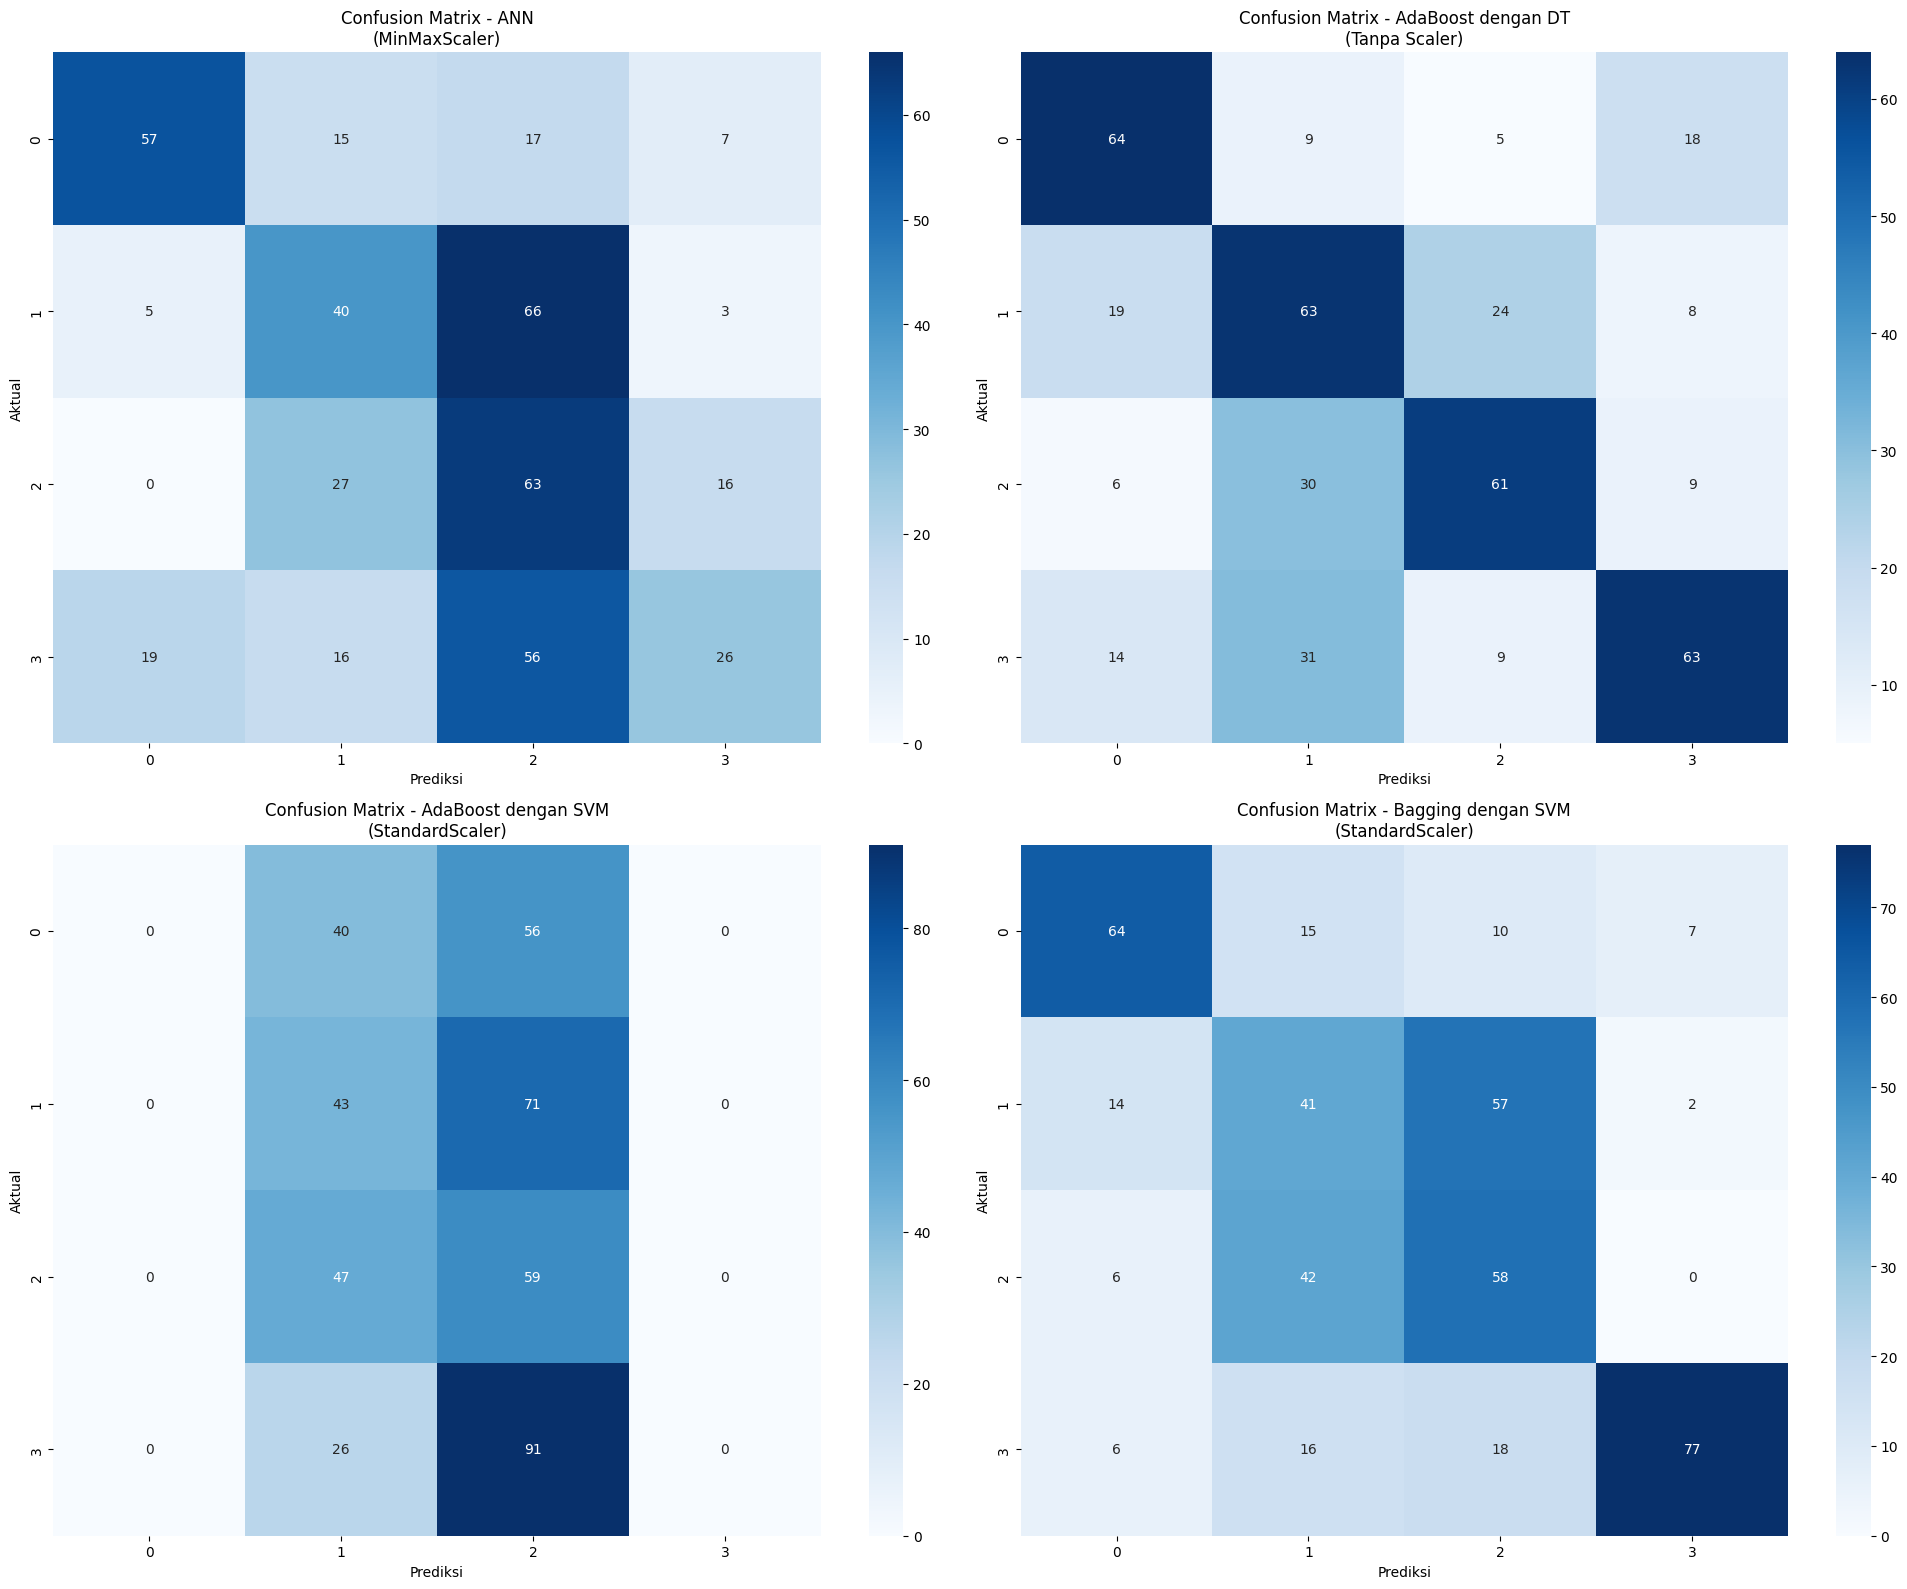

In [42]:
visualize_results(data_prep['y_test'], y_pred_ann, y_pred_adaboost_dt, y_pred_adaboost_svm, y_pred_bagging_svm)

## **ROC-AUC**

In [66]:
def plot_roc_per_model(model_probs, feature_groups, model_name, metrics_df, top_n=4):
    # Filter 6 grup fitur terbaik untuk model tertentu berdasarkan akurasi
    top_groups_df = metrics_df[metrics_df['Model'] == model_name].nlargest(top_n, 'Accuracy')
    top_groups = top_groups_df['Feature Group'].tolist()

    # Inisialisasi list untuk menampung hasil plot
    default_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

    # Binerisasi label uji berdasarkan grup fitur
    n_classes = len(np.unique(feature_groups[next(iter(feature_groups))]['y_test']))  # Tentukan jumlah kelas dari grup pertama
    classes = np.unique(feature_groups[next(iter(feature_groups))]['y_test'])
    y_test_bin = label_binarize(feature_groups[next(iter(feature_groups))]['y_test'], classes=classes)

    # Buat figure untuk menampilkan plot ROC dengan 2 baris dan 3 kolom
    fig, axes = plt.subplots(2, 2, figsize=(20, 18))
    axes = axes.flatten()  # Flatten agar mudah diiterasi

    # Iterasi untuk setiap kelas
    for i, class_idx in enumerate(range(n_classes)):
        ax = axes[i]  # Ambil subplot yang sesuai untuk kelas saat ini
        # Iterasi untuk setiap grup fitur (dataset)
        for j, group_name in enumerate(top_groups):
            y_prob = model_probs[group_name]
            y_test = feature_groups[group_name]['y_test']  # Ambil y_test berdasarkan grup fitur

            fpr, tpr, _ = roc_curve(y_test_bin[:, class_idx], y_prob[:, class_idx])
            roc_auc = auc(fpr, tpr)

            # Plot kurva ROC untuk grup fitur saat ini
            ax.plot(fpr, tpr, label=f'{group_name} (AUC = {roc_auc:.2f})', color=default_colors[j % len(default_colors)])

        # Detail plot
        ax.set_title(f'Class {class_idx}')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.legend(loc='lower right')
        ax.grid()

    plt.tight_layout()
    plt.show()

### **ROC-AUC ANN**

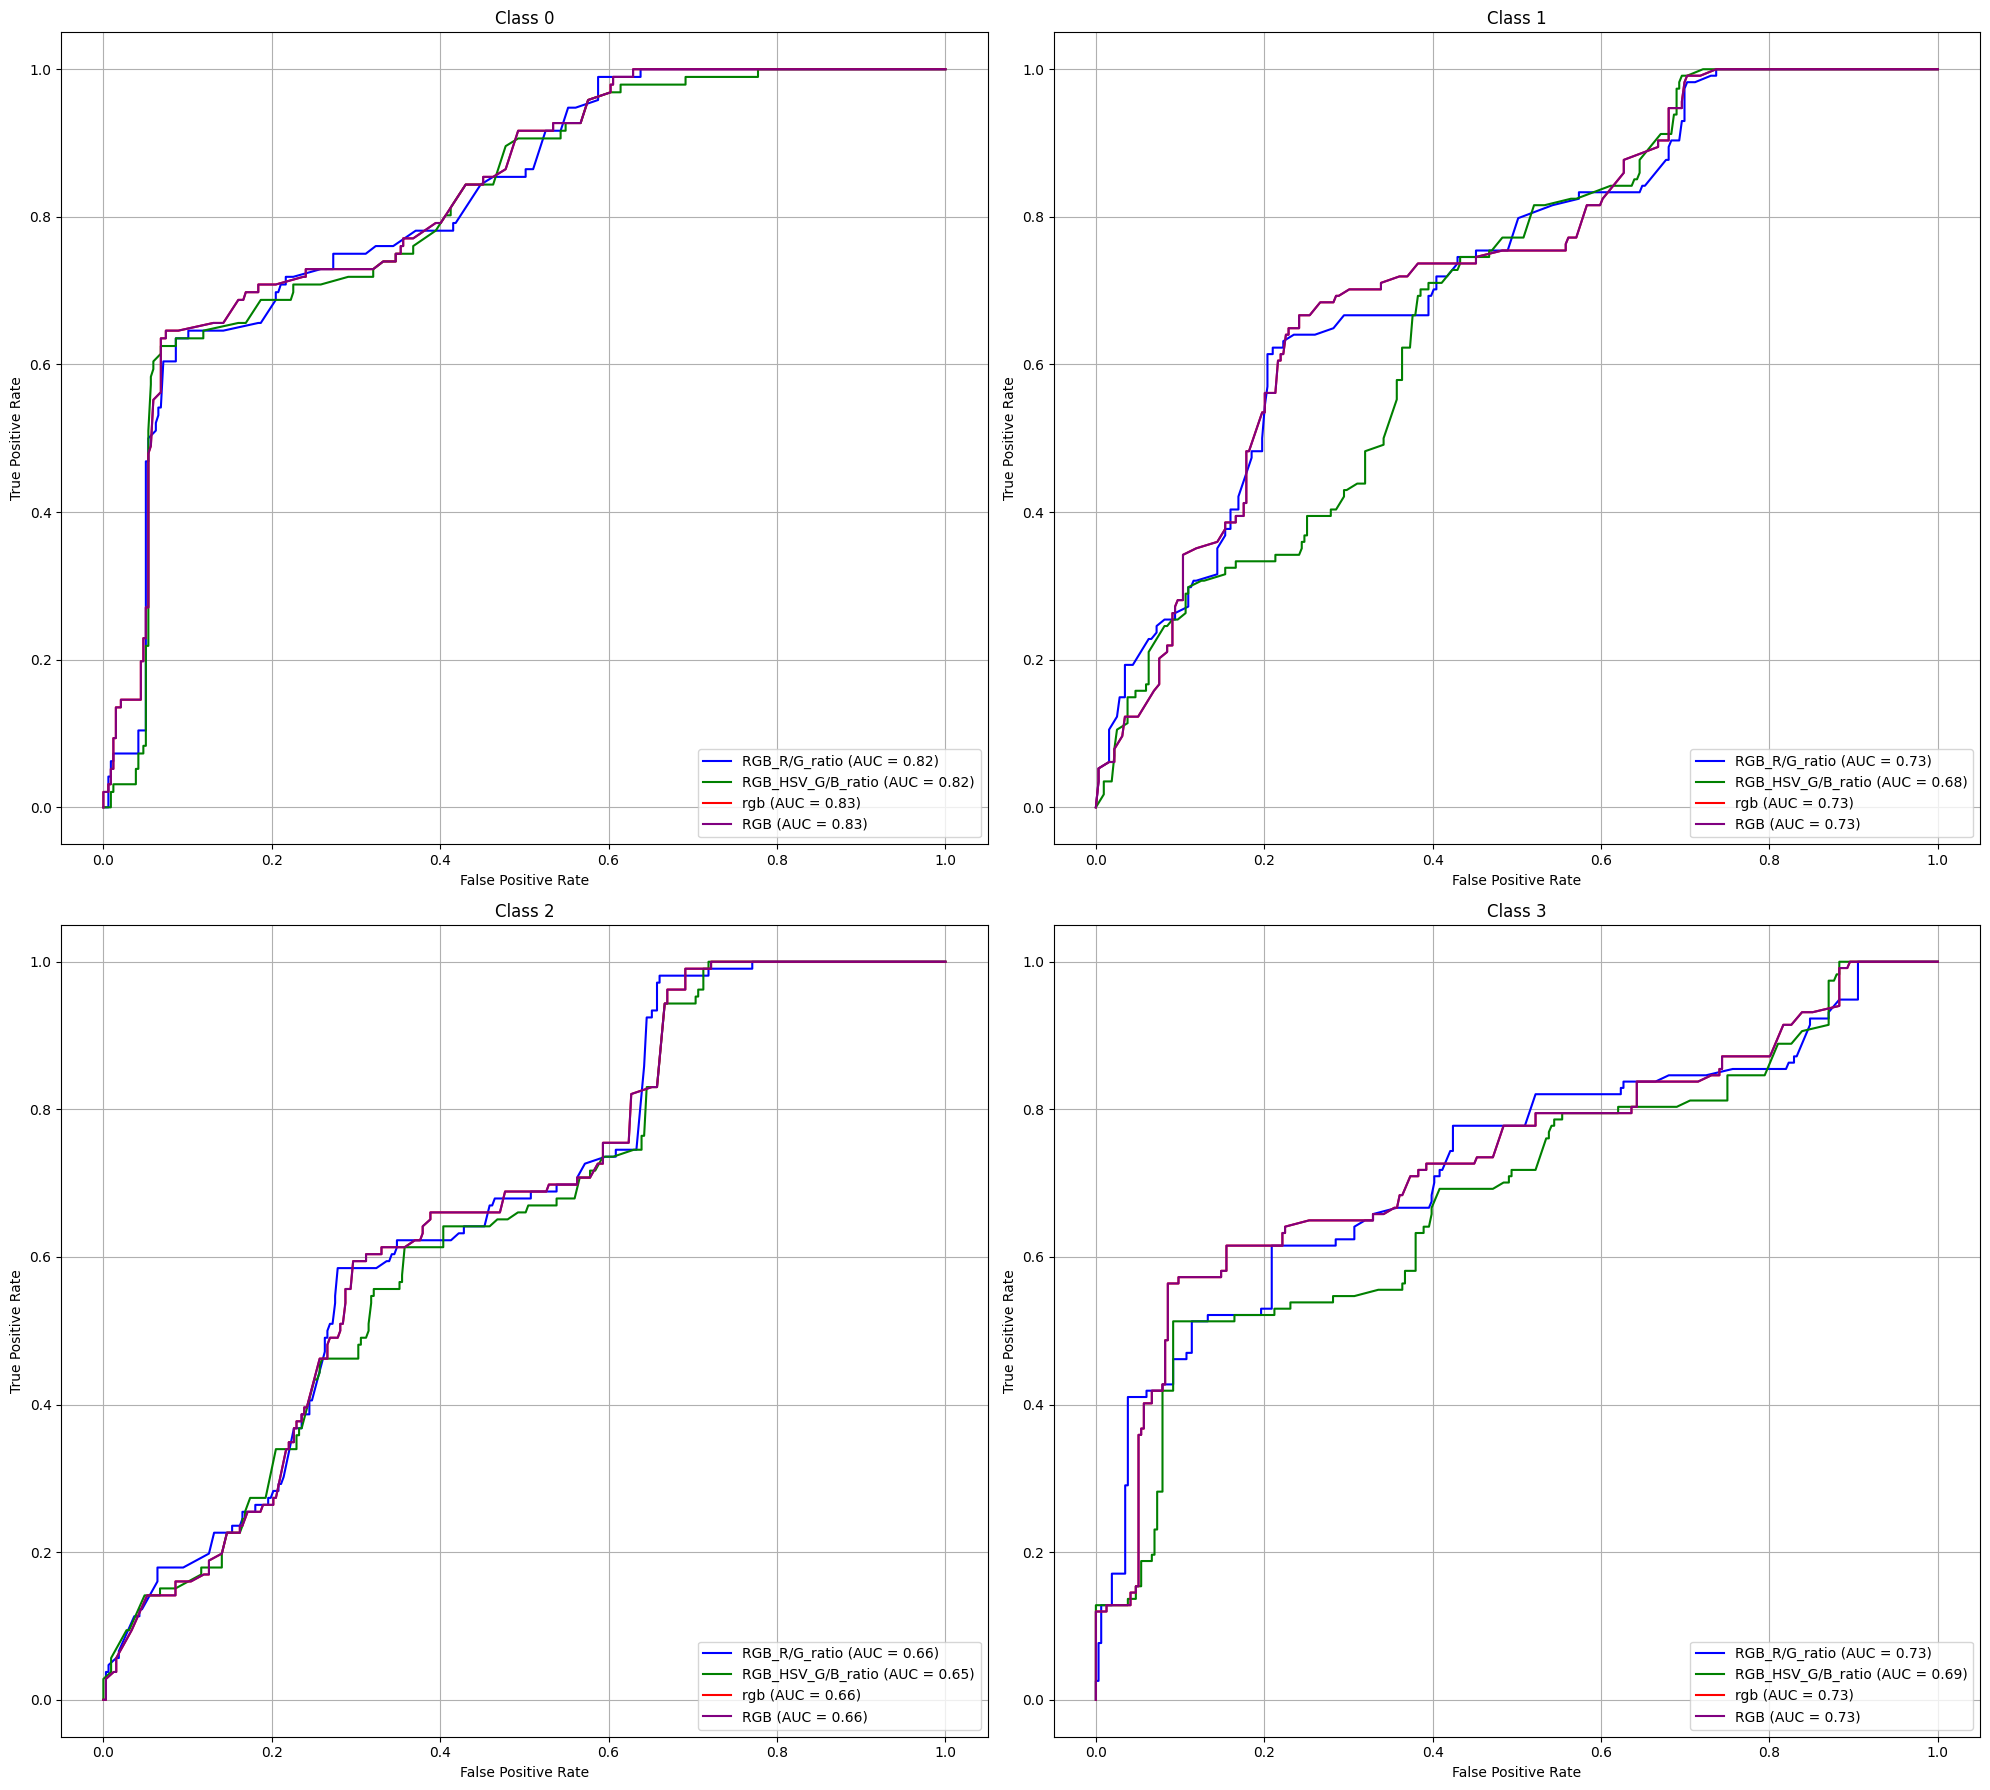

In [67]:
model_probs_ann = {group_name: results_ann[group_name]['y_prob'] for group_name in results_ann}
plot_roc_per_model(
    model_probs=model_probs_ann,
    feature_groups=data_prep,  # data_prep berisi 'X_train', 'X_test', 'y_train', 'y_test' per grup fitur
    model_name='ANN',  # Nama model yang sedang dievaluasi
    metrics_df=metrics_df_ann,  # DataFrame yang berisi metrik evaluasi model
)


### **ROC-AUC Adaboost Decision Tree**

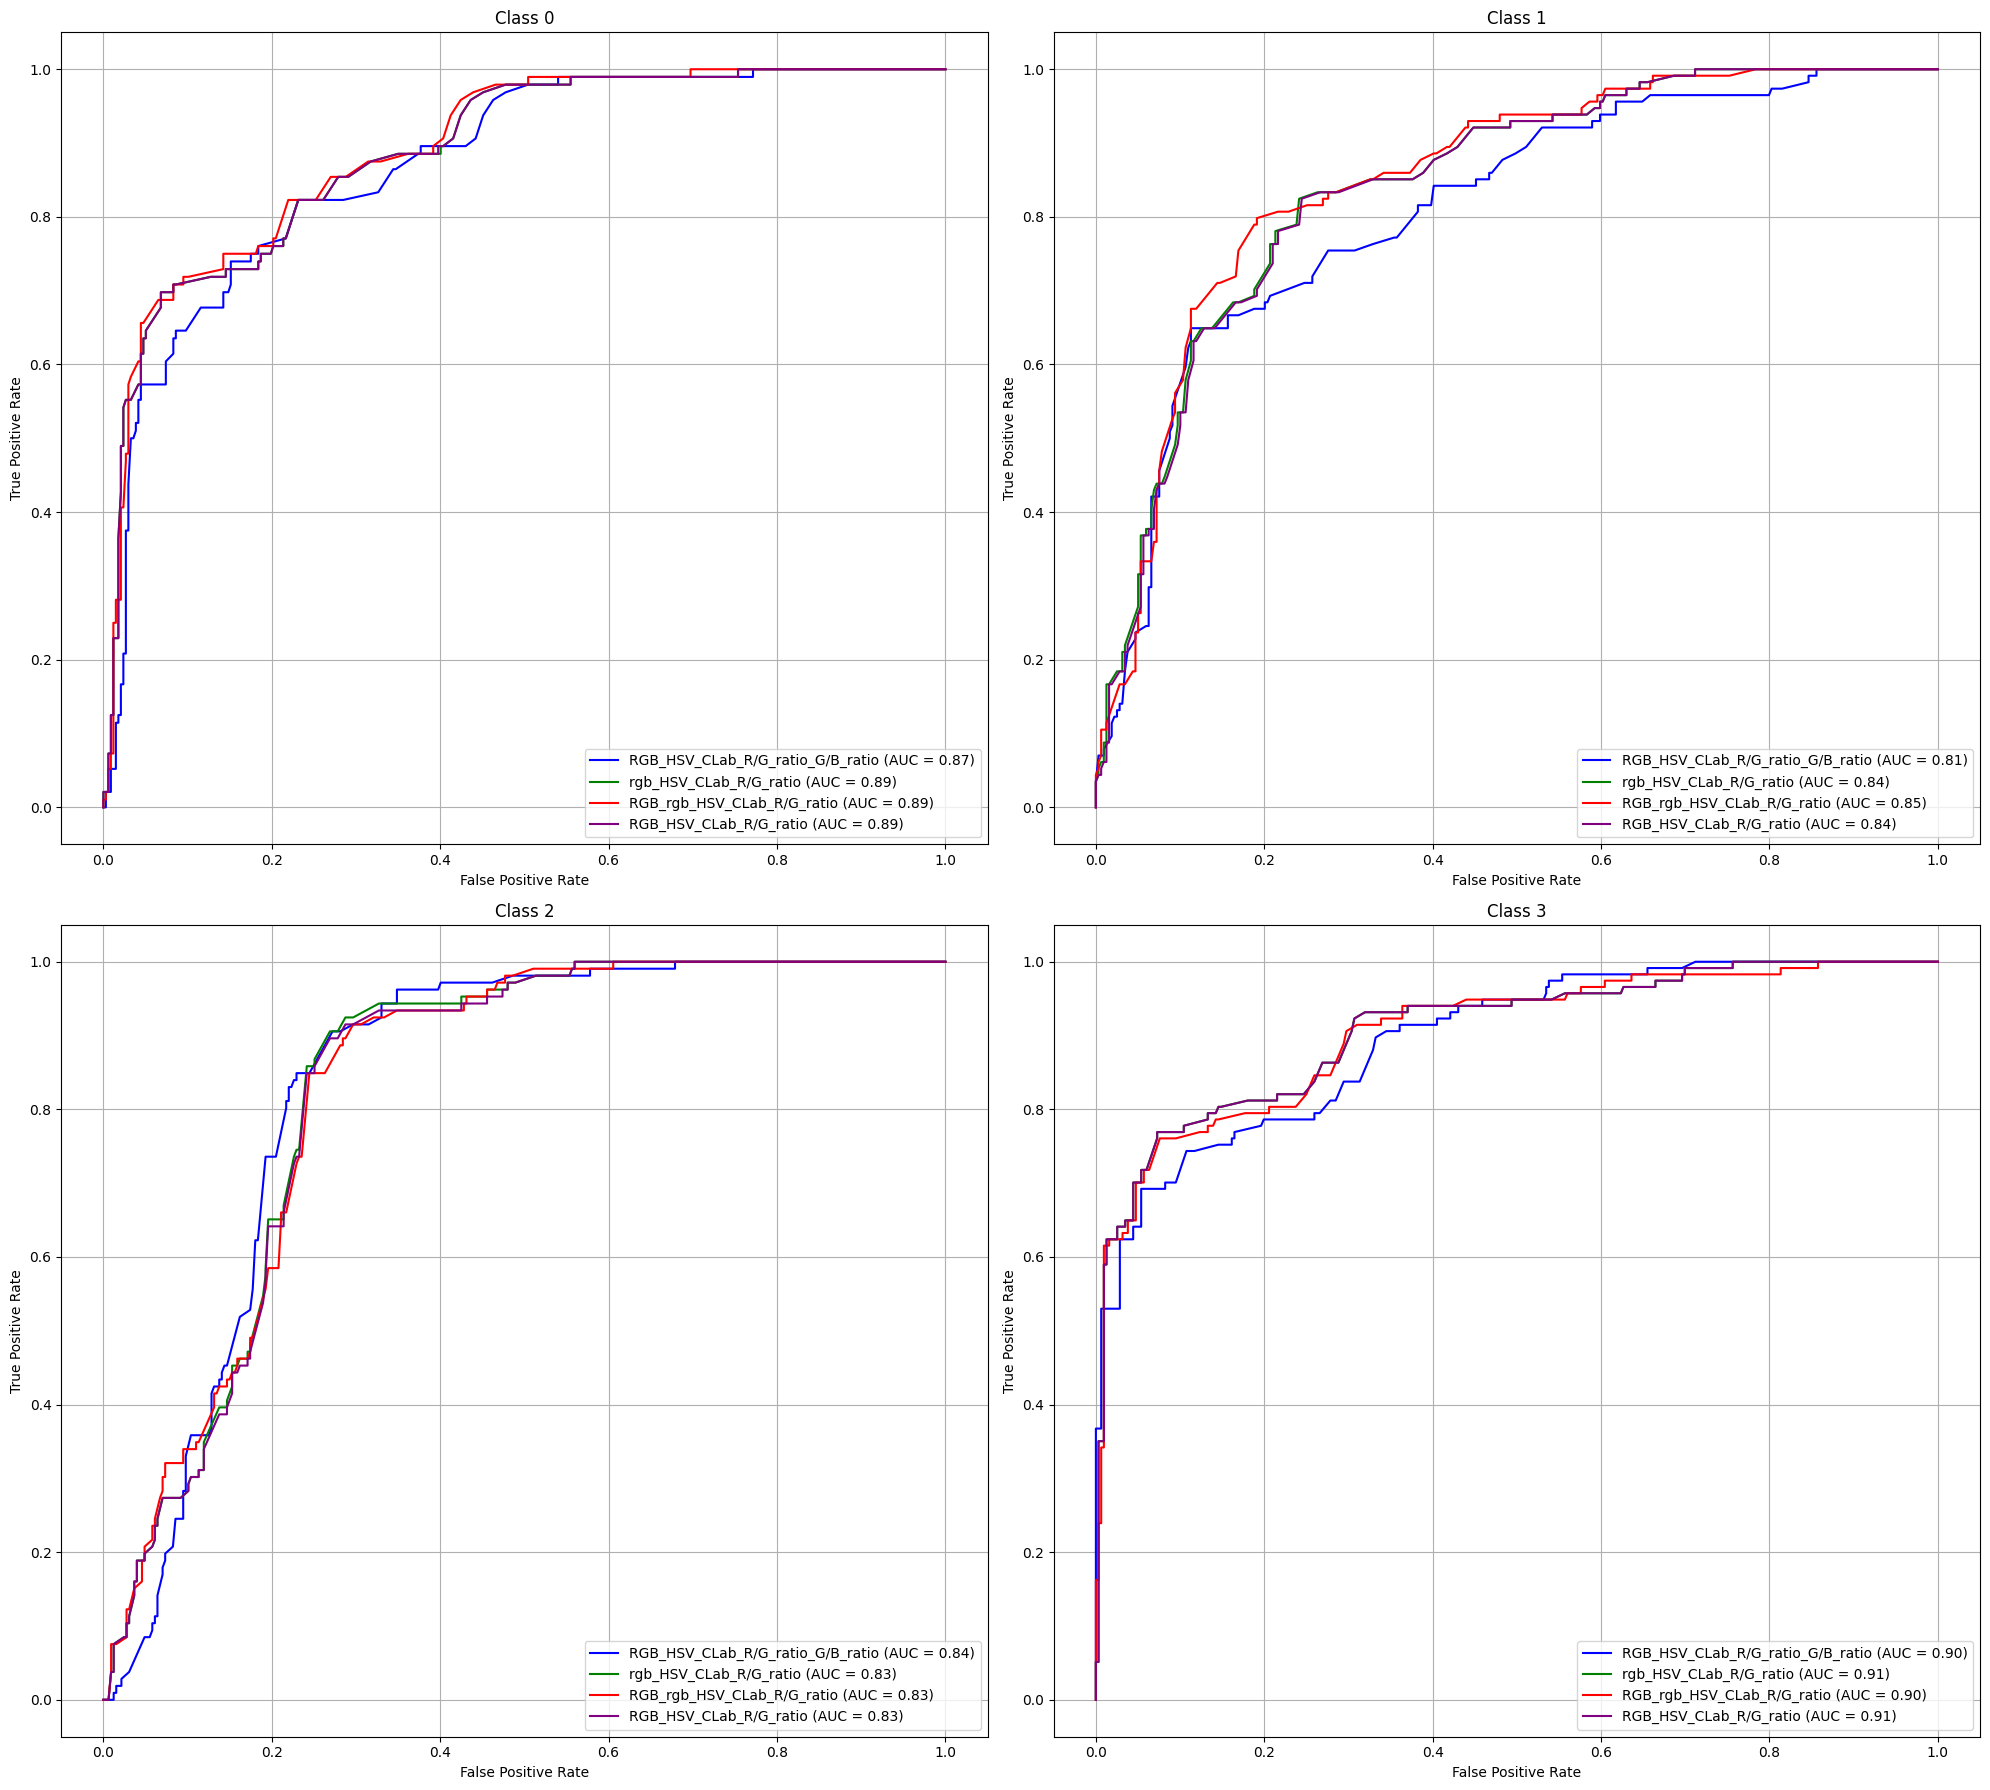

In [68]:
model_probs_adaboost_dt = {group_name: result_adaboost_dt[group_name]['y_prob'] for group_name in result_adaboost_dt}
plot_roc_per_model(
    model_probs=model_probs_adaboost_dt,
    feature_groups=data_prep,  # data_prep berisi 'X_train', 'X_test', 'y_train', 'y_test' per grup fitur
    model_name='AdaBoost DT',  # Nama model yang sedang dievaluasi
    metrics_df=metrics_df_adaboost_dt,  # DataFrame yang berisi metrik evaluasi model
)

### **ROC-AUC Adaboost SVM Kernel RBF**

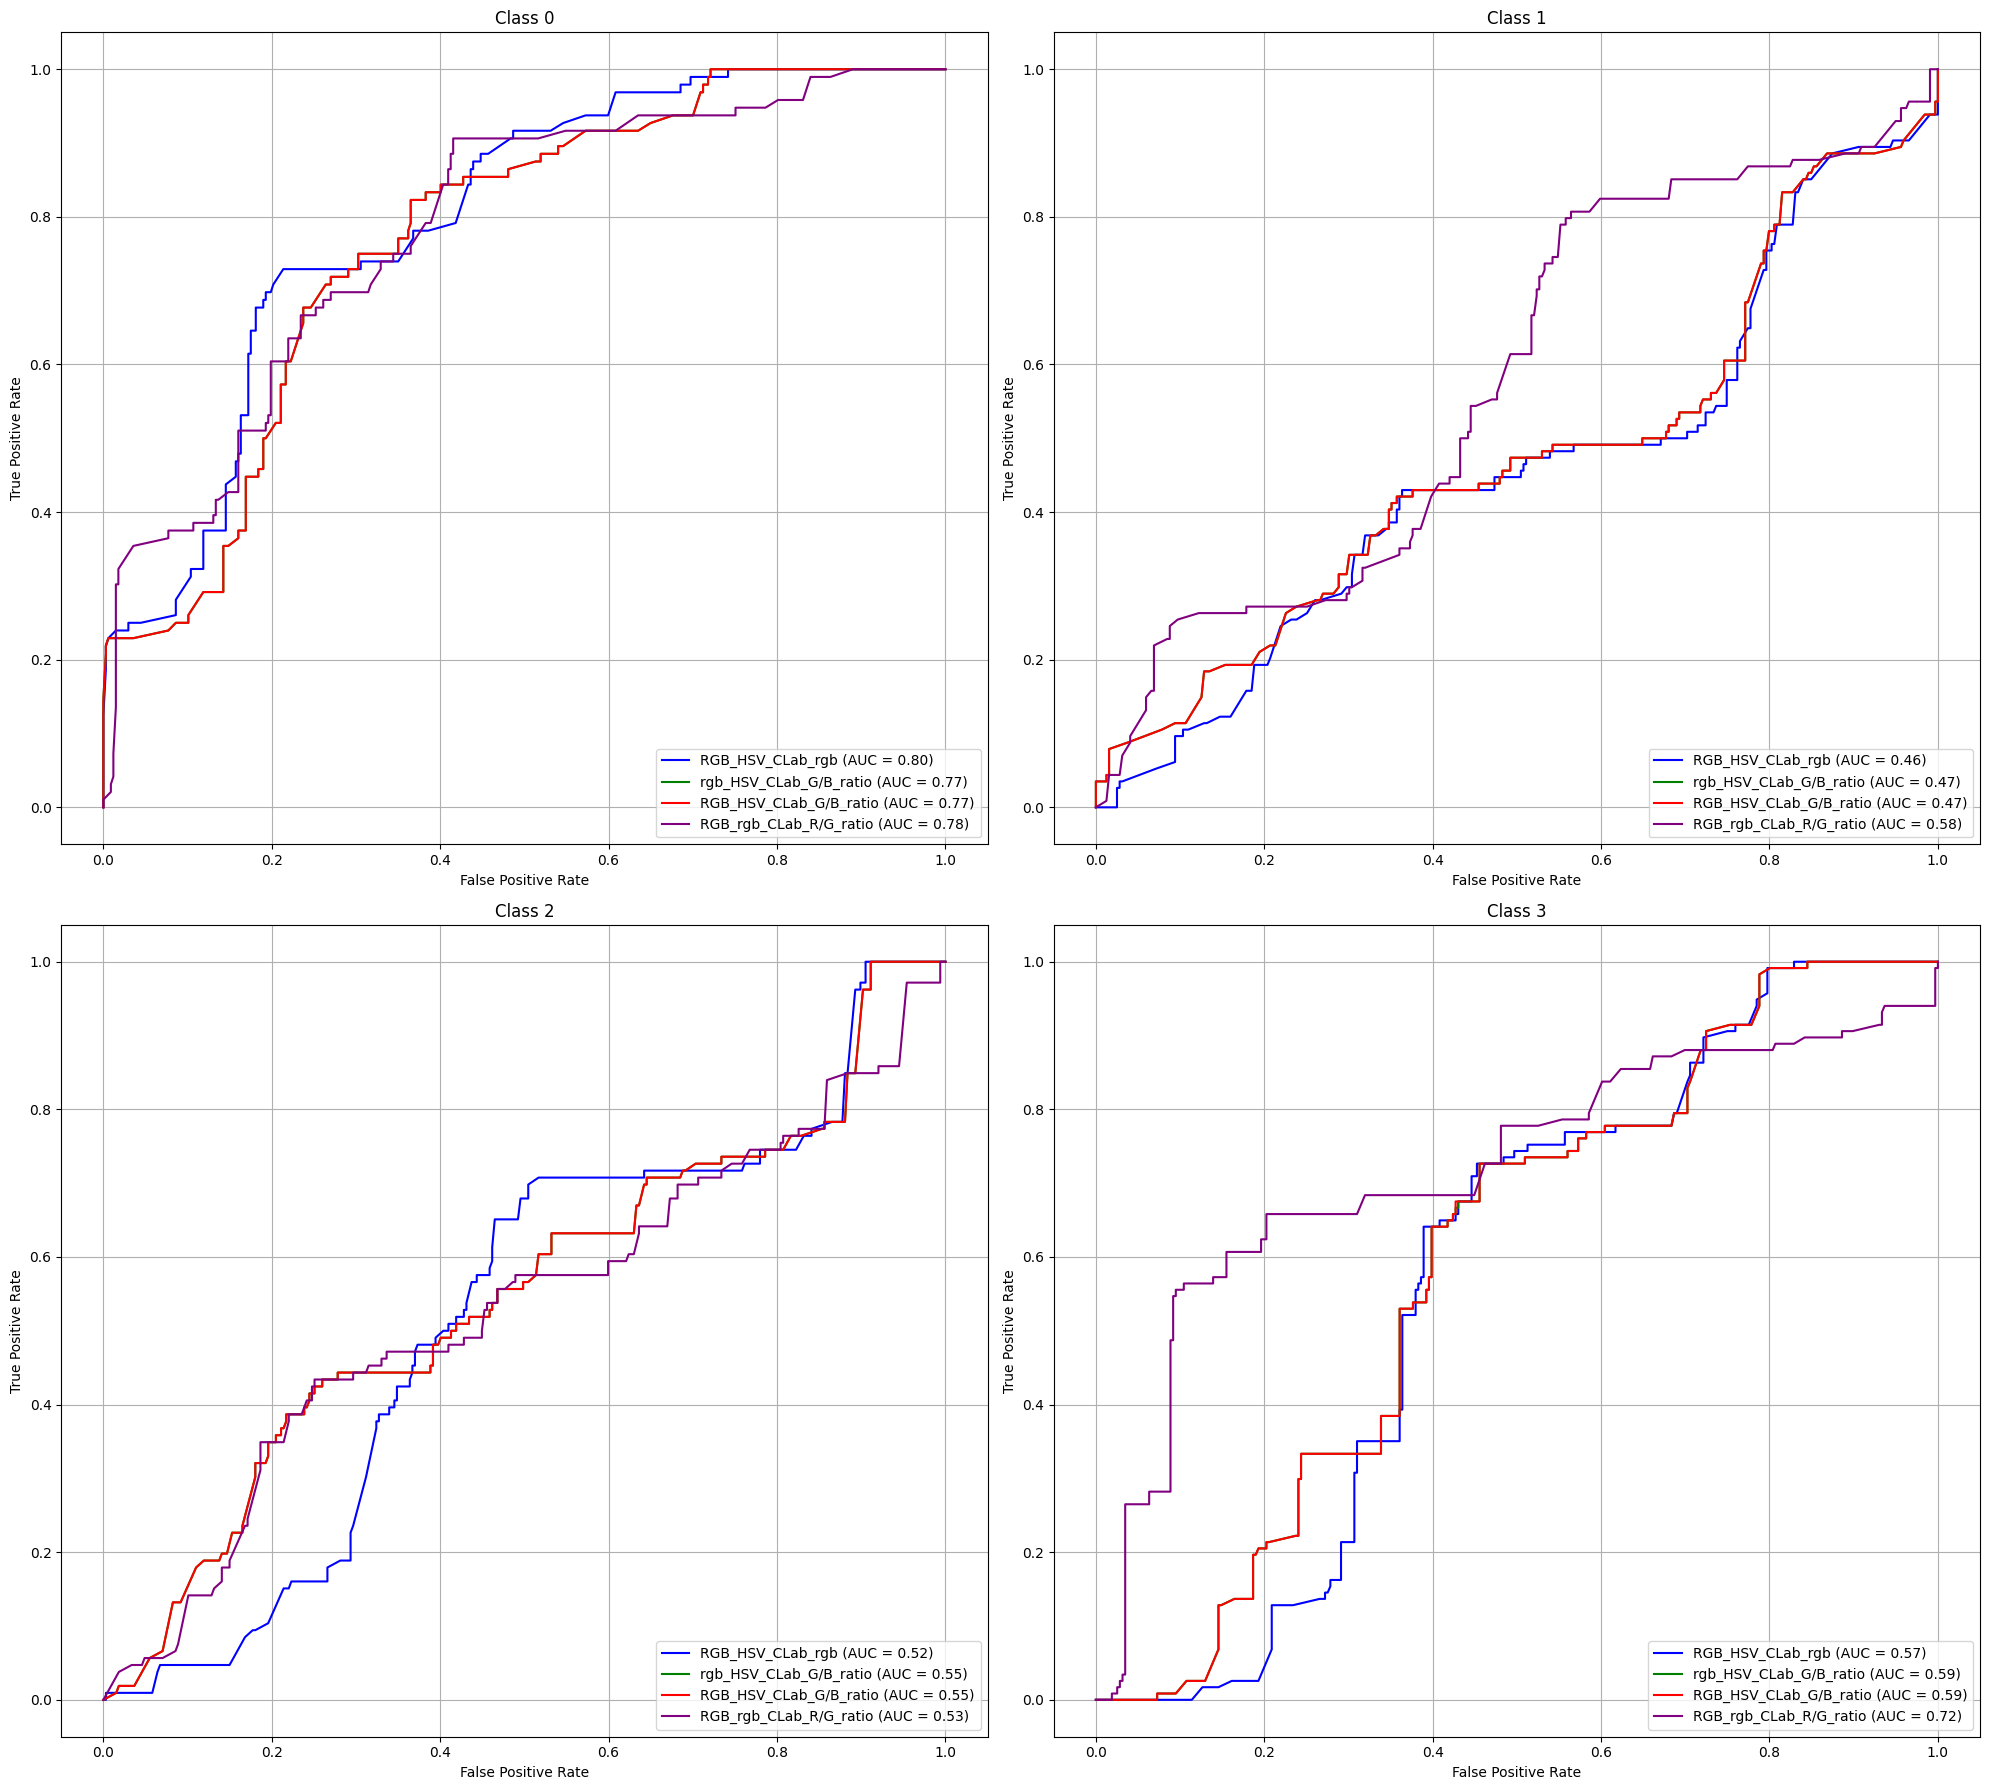

In [69]:
model_probs_adaboost_svm = {group_name: result_aboost_svm[group_name]['y_prob'] for group_name in result_aboost_svm}
plot_roc_per_model(
    model_probs=model_probs_adaboost_svm,
    feature_groups=data_prep,  # data_prep berisi 'X_train', 'X_test', 'y_train', 'y_test' per grup fitur
    model_name='AdaBoost SVM',  # Nama model yang sedang dievaluasi
    metrics_df=metrics_df_adaboost_svm,  # DataFrame yang berisi metrik evaluasi model
)

### **ROC-AUC Bagging SVM Kernel RBF**

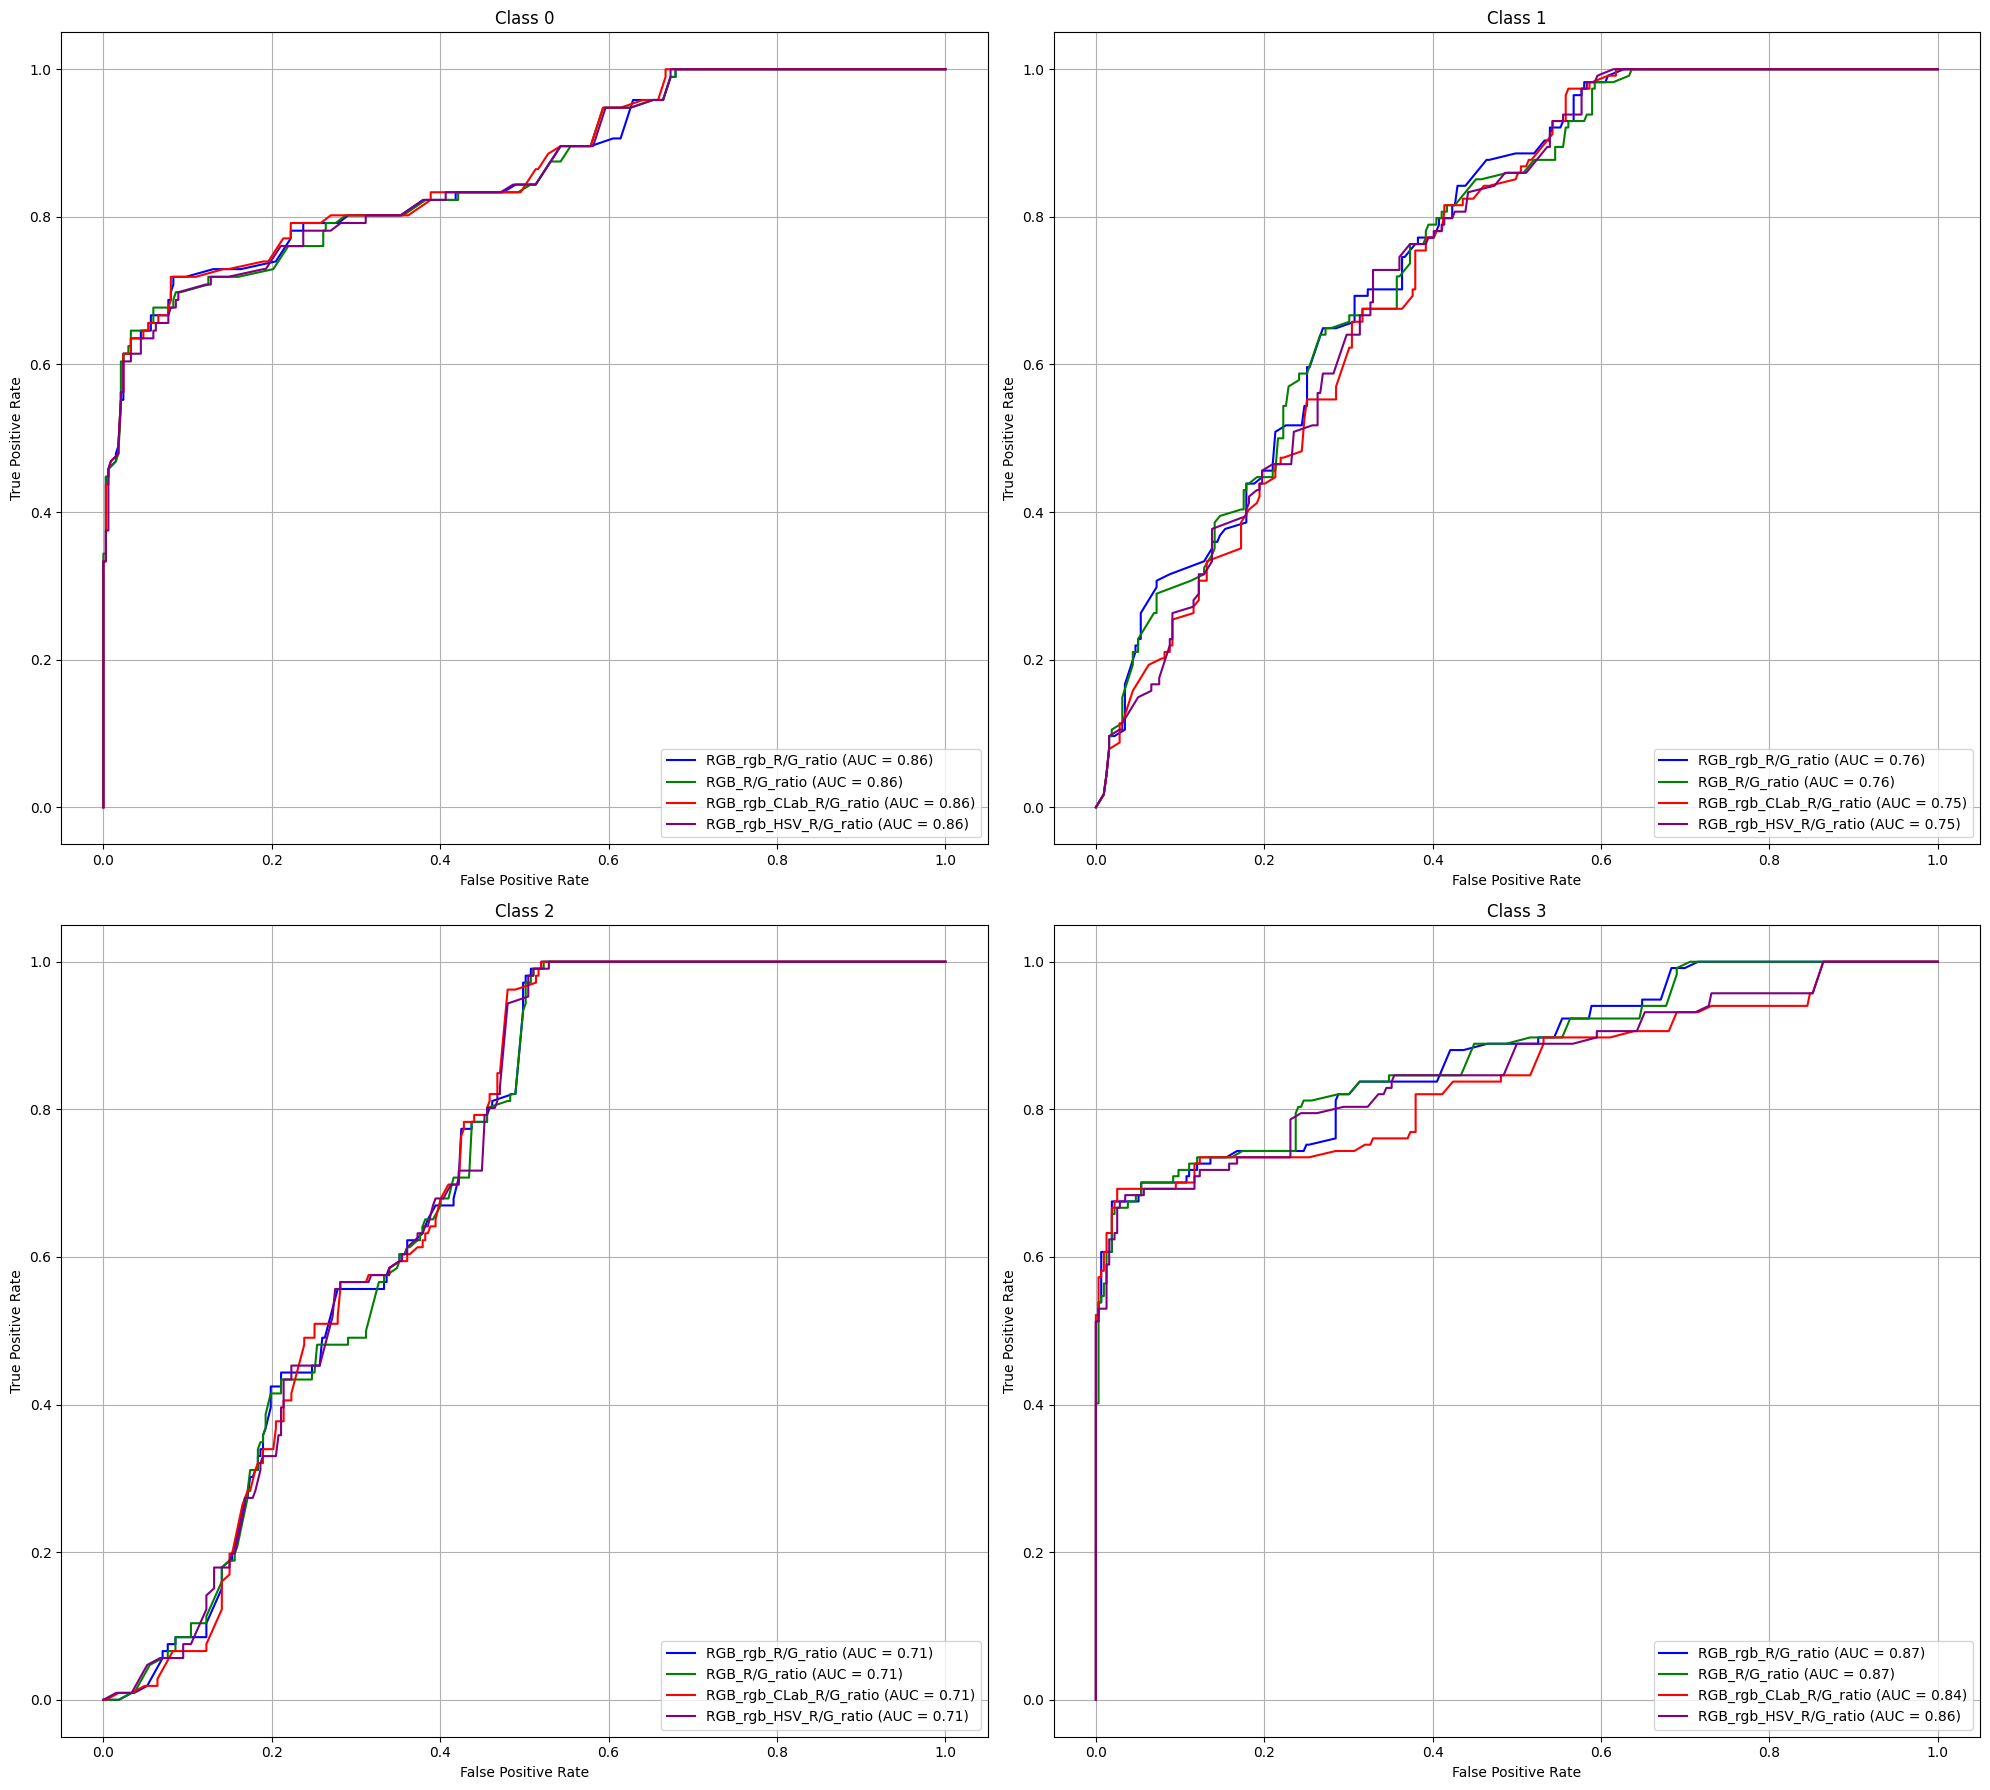

In [70]:
model_probs_bagging_svm = {group_name: result_bagging_svm[group_name]['y_prob'] for group_name in result_bagging_svm}
plot_roc_per_model(
    model_probs=model_probs_bagging_svm,
    feature_groups=data_prep,  # data_prep berisi 'X_train', 'X_test', 'y_train', 'y_test' per grup fitur
    model_name='Bagging SVM',  # Nama model yang sedang dievaluasi
    metrics_df=metrics_df_bagging_svm,  # DataFrame yang berisi metrik evaluasi model
)

## **Perbandingan Metrik**

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def compare_model_metrics(acc_ann, acc_adaboost_dt, acc_adaboost_svm, acc_bagging_svm, 
                          prec_ann, prec_adaboost_dt, prec_adaboost_svm, prec_bagging_svm, 
                          rec_ann, rec_adaboost_dt, rec_adaboost_svm, rec_bagging_svm, 
                          f1_ann, f1_adaboost_dt, f1_adaboost_svm, f1_bagging_svm):
    # Nama model
    model_names = [
        'ANN\n(MinMaxScaler)', 
        'AdaBoost DT\n(Tanpa Scaler)', 
        'AdaBoost SVM\n(StandardScaler)', 
        'Bagging SVM\n(StandardScaler)'
    ]
    
    # Data metrik
    accuracies = [acc_ann, acc_adaboost_dt, acc_adaboost_svm, acc_bagging_svm]
    precisions = [prec_ann, prec_adaboost_dt, prec_adaboost_svm, prec_bagging_svm]
    recalls = [rec_ann, rec_adaboost_dt, rec_adaboost_svm, rec_bagging_svm]
    f1_scores = [f1_ann, f1_adaboost_dt, f1_adaboost_svm, f1_bagging_svm]

    # Urutkan berdasarkan akurasi tertinggi
    sorted_indices = np.argsort(accuracies)[::-1]  # Urutkan dari tertinggi ke terendah
    sorted_models = np.array(model_names)[sorted_indices]
    sorted_accuracies = np.array(accuracies)[sorted_indices]
    sorted_precisions = np.array(precisions)[sorted_indices]
    sorted_recalls = np.array(recalls)[sorted_indices]
    sorted_f1_scores = np.array(f1_scores)[sorted_indices]

    # Plot: 2 baris, 2 kolom
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # 2 baris, 2 kolom

    # Plot 1: Akurasi
    bars_acc = axes[0, 0].bar(sorted_models, sorted_accuracies, color=plt.cm.Greens(np.linspace(0.9, 0.5, len(model_names))))
    axes[0, 0].set_ylim(0, 1.0)
    axes[0, 0].set_ylabel('Akurasi')
    axes[0, 0].set_title('Perbandingan Akurasi Model')

    # Tambahkan nilai akurasi di atas bar
    for bar in bars_acc:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                        f'{height:.4f}', ha='center', va='bottom')

    # Plot 2: Precision
    bars_precision = axes[0, 1].bar(sorted_models, sorted_precisions, color=plt.cm.Blues(np.linspace(0.9, 0.5, len(model_names))))
    axes[0, 1].set_ylim(0, 1.0)
    axes[0, 1].set_ylabel('Precision')
    axes[0, 1].set_title('Perbandingan Precision')

    # Tambahkan nilai precision di atas bar
    for bar in bars_precision:
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                        f'{height:.4f}', ha='center', va='bottom')

    # Plot 3: Recall
    bars_recall = axes[1, 0].bar(sorted_models, sorted_recalls, color=plt.cm.Oranges(np.linspace(0.9, 0.5, len(model_names))))
    axes[1, 0].set_ylim(0, 1.0)
    axes[1, 0].set_ylabel('Recall')
    axes[1, 0].set_title('Perbandingan Recall')

    # Tambahkan nilai recall di atas bar
    for bar in bars_recall:
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                        f'{height:.4f}', ha='center', va='bottom')

    # Plot 4: F1-Score
    bars_f1 = axes[1, 1].bar(sorted_models, sorted_f1_scores, color=plt.cm.Reds(np.linspace(0.9, 0.5, len(model_names))))
    axes[1, 1].set_ylim(0, 1.0)
    axes[1, 1].set_ylabel('F1-Score')
    axes[1, 1].set_title('Perbandingan F1-Score')

    # Tambahkan nilai F1-Score di atas bar
    for bar in bars_f1:
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                        f'{height:.4f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

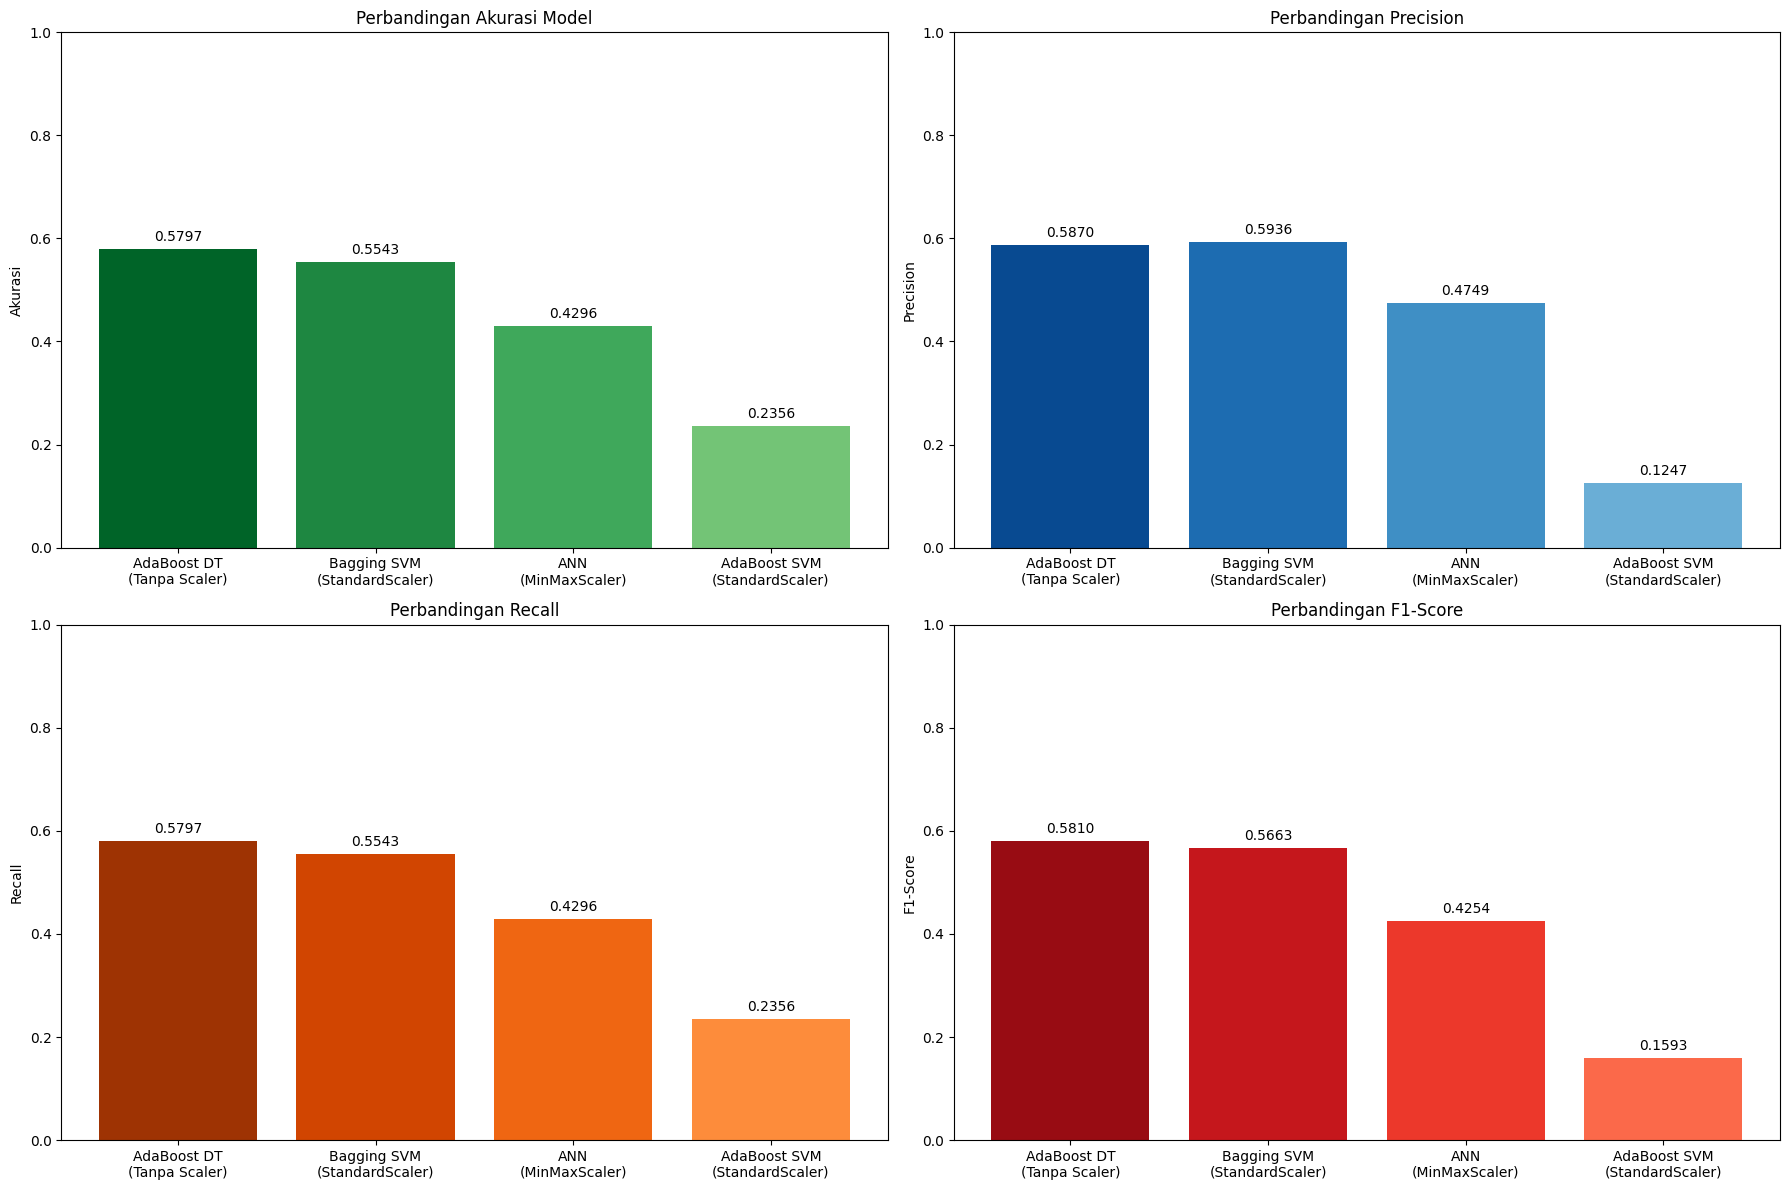

In [59]:
# Panggil fungsi untuk membandingkan akurasi dan menampilkan grafik
compare_model_metrics(
    acc_ann, acc_adaboost_dt, acc_adaboost_svm, acc_bagging_svm,
    prec_ann, prec_adaboost_dt, prec_adaboost_svm, prec_bagging_svm,
    rec_ann, rec_adaboost_dt, rec_adaboost_svm, rec_bagging_svm,
    f1_ann, f1_adaboost_dt, f1_adaboost_svm, f1_bagging_svm
)